# Comprendre et mettre en œuvre le calcul sur GPU avec Python

Pour lire correctement ce document sous jupyter vous devez installer les extensions pour [MyST Markdown](https://mystmd.org):

~~~bash
mamba/conda/pip install myst-nb jupyterlab-myst
~~~


~~~{figure} images/calcul_gpu.jpg
:align: center
:width: 700px


*Source [Pixabay](https://pixabay.com/photos/mining-ethereum-market-digital-2648005/) par [LauraTara](https://pixabay.com/users/lauratara-6167959/)*
~~~


Les **[GPU](https://fr.wikipedia.org/wiki/Processeur_graphique)** (Graphics Processing Unit) sont les processeurs de vos cartes graphiques. Typiquement, il s'agit des cartes graphiques comme NVIDIA/AMD.

Les [CPU](https://fr.wikipedia.org/wiki/Processeur)(Central Processing Unit) sont les processeurs de vos PC et smartphones qui font fonctionner vos systèmes d'exploitation. Typiquement il s'agit des processeurs comme les Intel core (i7/i9), AMD Ryzen ou ARM qui font fonctionner vos PC Linux/Mac/Windows ou Smartphones Android.

Comme nous l'avons vu dans le chapitre [Les concepts du parallèlisme](01_Les_concepts_du_parallelisme.ipynb) les GPU se différencient des CPU par le fait qu'ils possèdent des milliers d'unités de calculs (cœurs) contre seulement quelques dizaines - au mieux - pour les CPU.

Les cœurs de vos processeurs ont la charge d'exécuter vos programmes. Si vous disposez de 10 cœurs dans un processeur vous pouvez faire fonctionner jusqu'à 10 programmes en parallèle.

Une carte graphique comme la carte [NVIDIA RTX 5090](https://www.NVIDIA.com/fr-fr/geforce/graphics-cards/50-series/rtx-5090/) possède 21&nbsp;760 cœurs contre 192 pour le meilleur CPU du moment (janvier 2025) : [l'AMD Epyc 9965](https://www.amd.com/fr/products/processors/server/epyc/9005-series/amd-epyc-9965.html)

~~~{admonition} Question : Pourquoi alors les GPU n'ont pas déjà remplacé les CPU dans les système d'exploitation ?
:class: hint


Si je dispose d'une carte graphique avec des milliers de cœurs, j'en dédie une centaine pour l'[OS](https://fr.wikipedia.org/wiki/Syst%C3%A8me_d%27exploitation) - ce sera déjà bien mieux que ce que propose la plupart des CPU ayant moins de 10 cœurs - et je garde les autres pour la vidéo et le machine learning ? 

Ce sera à peine plus lent pour la vidéo et mons OS ira bien plus vite...

Ainsi j'économise le prix du CPU dans mon prochain PC de {del}`gamer` data-scientist !

**Effectivement, pourquoi ?**

---
A la différence des CPU ou chaque unité de calcul peut réaliser ses propres instructions indépendamment des autres unités, toutes les unités de calcul d'un GPU réalisent la même instruction en même temps. 

Ainsi, un cœur d'un CPU pourra surfer sur internet pendant qu'un second cœur fera de la bureautique et qu'un troisième jouera de la musique. Dans un GPU tous les cœurs feront la même opération en même temps.

Un CPU est donc très bien taillé pour faire tourner un [système d'exploitation - (OS)](https://fr.wikipedia.org/wiki/Syst%C3%A8me_d%27exploitation) car dans un OS de nombreux programmes différents s'exécutent en parallèle. C'est le 4x4 qui passe partout.

Quant-au GPU il est particulièrement adapté au calcul massivement parallèle sur de grandes quantités de données.

Imaginons ce cas de figure: vous disposez d'une carte graphique possédant 10&nbsp;000 cœurs et vous souhaitez incrémenter de 1 toutes les cases d'un tableau de 10&nbsp;000 éléments.

* Avec votre GPU chaque cœur se verra confier le calcul sur l'un des éléments du tableau : vous allez mettre à jour toutes les cases du tableau en 1 seule instruction qui sera exécutée sur chacun des cœurs en parallèle.
* Avec un CPU vous allez devoir utiliser un cœur qui va itérer sur chaque case du tableau avec une boucle et répéter l'opération 10&nbsp;000 fois, ce sera indéniablement plus long. Bien sur vous pourriez utiliser tous vos cœurs, mais comme vous en avez bien moins, vous n'échapperez pas à de bien plus longues boucles.

C'est l'idée globale, même si dans la pratique les choses sont un peu plus fines que cela, et que, par exemple, les CPU peuvent aller plus vite grace aux instructions [SIMD](https://fr.wikipedia.org/wiki/Single_instruction_multiple_data)...

C'est donc pour ces raisons que les CPU font toujours tourner nos OS et que les GPU sont recommandés pour le calcul numérique et le machine learning.
~~~

~~~{admonition} Question: mais alors pourquoi les CPU n'ont-ils pas plus de cœurs ? 
:class: hint

Ce serait quand même bien pratique, ils font pâle figure en regard des cartes graphiques.

---

Effectivement. En fait, pour que les cœurs d'un CPU soient indépendants les uns des autres, ceux-ci disposent d'un composant appelé ordonnanceur dont le rôle est de  répartir les instructions sur ces derniers, et, malheureusement, sa complexité augmente proportionnellement au carré du nombre de cœurs. 

Ceci rend donc très difficile la conception de CPU massivement parallèles.
~~~

Aujourd'hui trois constructeurs dominent le marché des cartes graphiques: NVIDIA, AMD(anciennement ATI) et Intel.

Les cartes graphiques des deux premiers sont aujourd'hui intégrées à votre ordinateur via des bus de données [PCI Express](https://fr.wikipedia.org/wiki/PCI_Express). Elles sont de plus en plus volumineuses et consommatrices d'énergie.

Par exemple le presque déjà ancien modèle [NVIDIA RTX 2080 Super](https://www.NVIDIA.com/fr-fr/geforce/graphics-cards/rtx-2080-super/) mesure 11x26 cm et utilise le volume de 2 slots PCIE ! Une alimentation de 650 Watts est recommandée !

Les cartes AMD/NVIDIA sont particulièrement adaptées pour le jeu vidéo et le machine learning elles disposent de milliers de cœurs.  

Les processeurs graphiques Intel sont généralement intégrés aux CPU et disposent de peu de cœurs.  

Par exemple le processeur [i9-14900KS](https://www.intel.com/content/www/us/en/products/sku/237504/intel-core-i9-processor-14900ks-36m-cache-up-to-6-20-ghz/specifications.html) intègre un processeur graphique Intel® UHD Graphics 770.

Ce dernier permet de faire tourner sans problème des applications bureautiques et de regarder des vidéos mais n'est pas aussi performant que les 2 autres concurrents pour les jeux vidéos modernes ou le calcul scientifique. Comme il est intégré avec le CPU il est nettement moins encombrant et consommateur d'énergie. C'est pour cela qu'il est bien souvent utilisé comme unique carte graphique sur les ordinateurs portables de type bureautique.

Les processeurs AMD comme le [Ryzen 9 9950X](https://www.amd.com/fr/products/processors/desktops/ryzen/9000-series/amd-ryzen-9-9950x.html) disposent aussi de *mini* cartes graphiques intégrées.

Cela semble moins connu, mais Intel propose aussi des cartes graphiques externes/PCI Express via la gamme [ARC](https://www.intel.fr/content/www/fr/fr/products/details/discrete-gpus/arc.html) ; cependant elles disposent seulement d'une vingtaine de cœurs.

Quand nous parlons de calcul sur GPU, nous parlons de calcul sur des processeurs graphiques dédiés et non sur ceux intégrés à vos CPU qui offrent beaucoup moins de puissance.  

## Pourquoi est-il utile de disposer d'un petit GPU ?

Il est aujourd'hui très fréquent de disposer de plusieurs GPU sur sa machine. Parfois même sans le savoir.   

Imaginons que vous ayez installé dans votre PC votre carte graphique dernier cri disposant de milliers de cœurs, mais vous avez aussi un processeur Intel/AMD équipé d'un petit GPU.

Vous disposez donc de 2 GPU qui peuvent l'un comme l'autre gérer votre vidéo et c'est une très bonne chose - même si le second n'est pas assez puissant pour jouer à vos jeux favoris !

Dans cette configuration, généralement, votre système d'exploitation vous permet de choisir quelle carte graphique utiliser pour la vidéo voire même selon l'application exécutée.

* Sous Windows vous pouvez identifier si vous disposez de plusieurs GPU dans le gestionnaire de périphériques
~~~{image} images/gestionnaire_peripheriques.png
:align: center
:width: 400px
~~~

* Sous Linux il existe de nombreuses manières de lister les GPUs/cartes graphiques disponibles.  
La commande `lscpi` est peut-être le moyen le plus simple.

```bash
bash$ lspci | grep -i VGA  # à saisir dans un terminal
01:00.0 VGA compatible controller: NVIDIA Corporation TU106BM [GeForce RTX 2070 Mobile] (rev a1)
08:00.0 VGA compatible controller: NVIDIA Corporation TU104 [GeForce RTX 2080 Rev. A] (rev a1)
```

Ce fil de discussion propose beaucoup d'autres [commandes pour lister la configuration de votre carte graphique](https://askubuntu.com/questions/5417/how-to-get-the-gpu-info) avec linux.  
Parmi celles-ci, la commande [inxi](https://github.com/smxi/inxi) offre de nombreuses informations sur votre matériel:

```bash
$ inxi -Fzxd

System:
  Host: <ComputerHostNameHere> Kernel: 5.3.0-53-generic x86_64 bits: 64 compiler: gcc 
  ...
Machine:
  ...
Battery:
  ...
CPU:
  Topology: 6-Core model: Intel Core i7-8700 bits: 64 type: MT MCP 
  arch: Kaby Lake rev: A L2 cache: 12.0 MiB 
  flags: lm nx pae sse sse2 sse3 sse4_1 sse4_2 ssse3 vmx bogomips: 76799 
  Speed: 1100 MHz min/max: 800/4600 MHz Core speeds (MHz): 1: 1100 2: 1101 
  3: 1100 4: 1100 5: 1100 6: 1100 7: 1100 8: 1100 9: 1100 10: 1100 11: 1100 
  12: 1100 
Graphics:
  Device-1: NVIDIA TU106BM [GeForce RTX 2070 Mobile] vendor: CLEVO/KAPOK 
  driver: NVIDIA v: 440.64.00 bus ID: 01:00.0 
  Display: x11 server: X.Org 1.19.6 driver: NVIDIA 
  resolution: 1680x1050~60Hz, 2560x1440~120Hz 
  OpenGL: renderer: GeForce RTX 2070/PCIe/SSE2 v: 4.6.0 NVIDIA 440.64.00 
  direct render: Yes 
Audio:
  ...
Network:
  ...
Drives:
  ...
  Message: No Optical or Floppy data was found. 
Partition:
  ...
Sensors:
  System Temperatures: cpu: 46.0 C mobo: N/A gpu: NVIDIA temp: 41 C 
  Fan Speeds (RPM): N/A 
Info:
  ...
```

Si l'on reprend la configuration affichée par la commande `lspci` proposant 2 cartes NVIDIA RTX 2070 et 2080 il s'agit d'une machine ou la première carte est intégrée au PC portable ; la seconde est une carte connectée via un boîtier externe sur port Thunderbolt 3.  Cela ne se devine pas avec la commande.

En fait ce listing est incomplet. 

Il en manque même une troisième, celle du processeur [Intel i7 - 8700](https://www.intel.fr/content/www/fr/fr/products/sku/126686/intel-core-i78700-processor-12m-cache-up-to-4-60-ghz/specifications.html) qui équipe le PC et qui dispose d'une puce Intel® UHD Graphics 630. Mais elle est inutilisable en raison d'une connectique un peu particulière du portable utilisé.

Vous allez penser ironiquement "Oh la malheureuse personne !" : ce n'est pas bien grâve, les 2 premières suffisent largement et le processeur UHD Graphics 630 ne nous intéresse pas.  
**Et bien, si, cela peut être vraiment pénalisant de ne pas avoir cet autre processeur de disponible, aussi petit soit-il.**

Nous allons expliquer pourquoi dans un instant.

Revenons à des sorties plus fréquentes.  En général vous voyez plutôt quelque chose comme ceci avec la commande `lspci`:

```bash
$ lspci | grep -i VGA
00:02.0 VGA compatible controller: Intel/AMD Corporation Device XXX
01:00.0 3D controller: NVIDIA/AMD Corporation YYY
```
Dans cette configuration vous disposez d'une carte vidéo 3D hautes performances et d'une carte plus modeste intégrée au processeur.  
Quand vous calculez avec le GPU de votre PC portable/desktop, il est très utile de disposer des deux.

Comme votre système d'exploitation vous permet de choisir la carte graphique à utiliser pour l'affichage vidéo vous pouvez indifféremment basculer sur l'une ou l'autre.  

Et cela est vraiment très pratique:  

* Sur batterie vous utilisez la carte la moins consommatrice, celle du processeur, et vous pouvez terminer de saisir votre rapport dans le train avant de vider la batterie de votre portable.
* Sur courant, vous basculez sur la carte hautes performances pour vos applications les plus exigeantes.

Linux possède des commandes pour basculer l'affichage graphique d'un GPU à l'autre:
Une recherche Internet vous retournera de nombreuses réponses comme ce tutorial [Howto switch Intel and NVIDIA](https://www.linuxbabe.com/desktop-linux/switch-intel-NVIDIA-graphics-card-ubuntu)

Pour les cartes NVIDIA la commande est `prime-select` 

Lister les cartes disponibles:

```bash
$ sudo prime-select query
NVIDIA
intel
```

Sélectionner une carte:
```bash
$ sudo prime-select intel
```

Mais pourquoi sélectionner la carte la moins performante ! Nous voulons utiliser toute la puissance de ce PC !

Justement:  Nous allons lancer des calculs sur GPU.  Nous allons les exécuter sur la carte la plus puissante, donc NVIDIA dans cet exemple.  

Si vous lancez les calculs sur le GPU utilisé pour l'affichage graphique, ce qui est tout à fait possible, vous risquez de ralentir considérablement le rafraichissement de l'écran quand la carte tournera à plein régime pour vos calculs.

C'est ce qui se passe sur mon PC quand je fais du machine learning et que je n'ai pas connecté le boîtier externe: je ne peux même plus surfer sur internet pendant que le GPU calcule car le processeur graphique n'a pas le temps de rafraîchir l'écran, il calcul des descentes de gradients à tours de bras...  

Et franchement c'est pénible. Ne vous plaignez plus d'avoir un chipset graphique moins performant que vous n'utilisiez pas. Aujourd'hui il va vous permettre de poursuivre la lecture e ce tutoriel pendant vos calculs ! 

C'est même une condition d'achat du CPU si vous souhaitez calculer sur votre machine personnelle : **le CPU doit disposer d'un petit GPU interne pour décharger le GPU qui calculera.**

## Un mot sur les boîtiers externes - eGPU

En terme de calcul sur GPU, il devient de plus en plus fréquent d'utiliser des cartes graphiques placées dans des boîtiers externes (eGPU - external GPU), ce qui offre de nombreux avantages comme de pouvoir changer la carte plus facilement ou ne pas la  brancher si vous n'en avez pas l'usage, ou de doper un laptop qui ne serait pas évolutif, ou encore de la prêter à votre collègue, car il faut le dire, vous n'utilisez pas tout le temps votre GPU à 100% de ses capacités. 

Dans ce cas vous devez utiliser une connexion entre le boitier et le PC qui puisse offrir un débit suffisant pour les échanges de données avec le CPU.  
A défaut, les performances ne seront pas au rendez-vous.

Aujourd'hui les ports [Thunderbolt 3 et 4](https://fr.wikipedia.org/wiki/Thunderbolt_(interface)) offrant un débit de 40Gbit/sec sont adaptés à ce type de transfert.  

Les versions précédentes de la norme, comme Thunderbolt 2 avec 20Gbit/sec de débit ne sont pas suffisantes. Si vous utilisez ce type de configuration, tout le temps de calcul gagné en utilisant la carte graphique externe sera reperdu par les échanges entre le CPU et le GPU en raison de leur trop grande lenteur.

Il convient donc d'être vigilant sur le choix de la connectique.  

**Le cable doit aussi être adapté au type de la connexion**.

Pour creuser le sujet, voci deux articles qui vous donneront quelques pistes pour transformer votre laptop en une machine de guerre utilisant un GPU externe:
* [9 Things You Need to Know About External GPUs](https://laptopjudge.com/using-external-gpus-with-laptops)
* [How to use an external GPU on a Laptop?](https://www.madpenguin.org/how-to-use-an-external-gpu-on-a-laptop/)

Le site [eGPU.io](https://egpu.io) propose un intéressant listing pour vous aider à [choisir votre GPU externe](https://egpu.io/best-egpu-buyers-guide/) ou [construire le votre](https://egpu.io/best-external-graphics-card-builds/).

## Un mot sur la mémoire de votre carte graphique

Vous avez investi. Vous avez un ordinateur portable avec un maximum de RAM, disons 64Go, et une carte graphique aux performances fabuleuses équipée de seulement 4Go de RAM.  

Ce n'est pas grâve pensez-vous, 4Go c'est suffisant pour l'écran et pour les data il y a 64Go du CPU, le GPU n'aura qu'à y piocher ce qu'il veut, de toutes façons j'utilise rarement tout.  

Ce n'est pas une solution. 

Les calculs sur GPU se font dans la mémoire de la carte graphique. Et les échanges avec la mémoire du PC sont un véritable goulot d'étranglement.  Il est donc important de disposer d'une carte graphique possédant beaucoup de mémoire si vous envisagez de lui confier des données volumineuses à traiter.  
Sinon vous découvrirez les rapidement les drames du *Memory Overflow*.

## Calculer sur GPU - GPGPU

[General Purpose computing on GPU](https://en.wikipedia.org/wiki/General-purpose_computing_on_graphics_processing_units) est le terme désignant le calcul sur GPU pour des problématiques habituellement confiées à des CPU.

Le calcul sur GPU a commencé à devenir populaire vers 2001 lorsque les processeurs graphiques ont intégré des unités de calcul en virgule flottante. Puis des opérations d'algèbre linéraire comme le calcul vectoriel et matriciel.  

En 2005, [la décomposition LU](https://fr.wikipedia.org/wiki/D%C3%A9composition_LU) fut un des premiers programmes ayant réussi à fonctionner plus rapidement sur GPU que sur CPU.

Mais la programmation pour GPU était alors très différente de la programmation pour CPU, plus laborieuse et compliquée, bas niveau. Les GPU ont des instructions moins riches que les CPU et des concepts bien différents.  

L'arrivée de librairies comme [CUDA](https://en.wikipedia.org/wiki/CUDA) et [OpenCL](https://fr.wikipedia.org/wiki/OpenCL) ont permis d'écrire des programmes pour GPU en s'affranchissant de nombreux concepts bas niveau spécifiques à chaque modèle de carte graphique. Ceci a boosté le développement du calcul sur GPU qui est alors devenu beaucoup plus accessible.

Enfin, l'arrivée du BigData et du Machine Learning manipulant des données très volumineuses (généralement de grands vecteurs) ont trouvé dans les opérations matricielles offertes par les GPU modernes le moyen de mettre en œuvre tout leur potentiel. Offrant ainsi à ces disciplines leurs lettres de noblesse.


## Les librairies Python pour calculer sur GPU

Python possède plusieurs librairies permettant d'exécuter des calculs sur GPU:

* [PyOpenCL](https://documen.tician.de/pyopencl/), comme son nom l'indique, implémente l'API [OpenCL](https://fr.wikipedia.org/wiki/OpenCL) en Python. Cette API offre l'avantage de supporter tout type de matériel, CPU, GPU, FPGA, DSP, ...   
C'est une des rares librairies qui permet d'écrire un code compatible avec les 2 modèles de cartes AMD et NVIDIA (et bien d'autres)
* [PyCuda](https://mathema.tician.de/software/pycuda/) est un projet proche de PyOpenCL qui permet d'utiliser à l'API Cuda des cartes NVIDIA.  
  Mais cette librairie ne fonctionne qu'avec les cartes NVIDIA.
* [pygpu](https://github.com/Time-Coder/PyGPU) implémente des tableaux à N dimensions pour GPU.  
  La librairie se veut simple, cross architecture openCL/cuda et riche en fonctionnalités - mais n'est plus maintenue depuis quelques années déjà.  
  Elle reste interessante pour comprendre la difficulté de mise en œuvre de la discipline.
* [Scikit-cuda](https://scikit-cuda.readthedocs.io/en/latest/) fournit une interface Python pour de nombreuses fonctions des API CUDA, CUBLAS, CUFFT, et CUSOLVER de NVIDIA et réimplémente ainsi tout une partie de la librairie Scipy sur GPU.
* [Numba](https://numba.pydata.org/) est une librairie de compilation [Just In Time/A la volée](https://fr.wikipedia.org/wiki/Compilation_%C3%A0_la_vol%C3%A9e) permettant notamment la compilation pour CPU et GPU.  
   Elle supportait anciennement les architectures [NVIDIA - CUDA](https://fr.wikipedia.org/wiki/Compute_Unified_Device_Architecture) et [AMD - ROCm](https://www.amd.com/fr/products/software/rocm.html) (avec certaines restrictions). Cependant ROCm n'est plus géré aujourd'hui.  
  Elle reste un choix très intéressant pour certains codes de calculs mais demande un refactoring non trivial.  
* [Cupy](https://cupy.dev/) est une librairie d'algèbre linéaire optimisée avec NVIDIA CUDA. Elle propose aussi un support expérimental pour AMD Rocm (4 & 5)   
  Elle utilise aussi les autres librairies NVIDIA comme cuBLAS, cuDNN, cuRand, cuSolver, cuSPARSE, cuFFT et NCCL ce qui permet d'utiliser tout le potentiel de votre GPU.  
  Son API est calquée sur celle de [Numpy](http://www.numpy.org) ; elle peut très souvent remplacer sans effort cette dernière. 
* Le projet [RAPIDS AI](https://rapids.ai/about.html) soutenu par NVIDIA propose de multiples librairies de datascience ré-écrites pour fonctionner sur GPU NVIDIA via CUDA.  
  Le projet permet réimplémente des *clones* de plusieurs librairies Python phares pour leur permettre de fonctionner sur GPU:
    * [cuDF](https://github.com/rapidsai/cudf) propose des DataFrames *à la pandas* fonctionnant sur GPU
    * [cuML](https://github.com/rapidsai/cuml) ré-implémente les algorithmes classiques de machine learning (arbres de décision, svm...) avec une API calquée sur [scikit-learn](https://scikit-learn.org/stable/index.html) mais sur GPU
    * [cuGraph](https://github.com/rapidsai/cugraph) propose des algorithmes de gestion de graphes avec une API inspirée de [NetworkX](https://networkx.github.io/)
    * D'autres librairies sont aussi disponibles  
  Enfin, le projet propose une page pour vous aider à configurer votre environnement virtuel conda/pip ou docker: https://docs.rapids.ai/install/#selector
* Depuis décembre 2023 la librairie de calcul distribué [dask](https://www.dask.org/) permet d'utiliser des GPU NVIDIA via Cupy et cuDF au lieu de tableaux numpy/pandas
* Depuis septembre 2024 la librairie [polars](https://pola.rs/) offre un support expérimental sur GPU
* Enfin, [xarray](https://xarray.dev/) dispose aussi d'un support expérimental sur GPU

Pour les réseaux de neurones, les principales librairies: PyTorch, Tensorflow, Mxnet sont compatibles avec les GPU AMD/NVIDIA depuis leur création. Toutefois pour calculer sur plusieurs GPU sur plusieurs machines, la librairie [Horovod](https://horovod.ai/) est une solution qui peut grandement vous simplifier la tâche.



## Quel GPU utiliser avec Python ?

Si vous faîtes du machine learning, peu importe, pour les réseaux de neurones, les 2 librairies phares du marché [Tensorflow](https://www.tensorflow.org/?hl=fr) et [PyTorch](https://pytorch.org/)  fonctionnent indifféremment sur GPU NVIDIA/AMD.

Si vous utilisez pandas, numpy, polars, scikit-learn, networkx, dask ou xarray, pas d'hésitation, leurs équivalents respectifs pour GPU, à savoir cudf, cupy, polars(gpu), cuML, cuGraph et xarray(gpu) ne fonctionnent que sur des cartes graphiques de la marque NVIDIA.  

Si vous souhaitez compiler du code python sur GPU avec numba, là encore NVIDIA reste le choix favoris, l'architecture ROCm n'est plus testée/gérée par numba depuis sa version 0.6

NVIDIA semble avoir bien compris que la datascience fait vendre des GPU et que Python est le langage de prédilection de la datascience. Aussi NVIDIA se donne beaucoup de moyens pour que ses cartes graphiques soit parfaitement gérées par Python. NVIDIA est d'ailleurs à l'origine du projet Rapids AI.

AMD ne semble pas concerné par la question. Toutefois cela ne l'empêche pas de percer dans le milieu avec ses cartes accélérateurs AMD Instinct MI puisque [les 2 plus performants supercalculateurs au monde en sont équipés en novembre 2024](https://top500.org/lists/top500/2024/11/)

**Mais si vous ne faîtes pas de machine learning, il faut actuellement oublier AMD avec Python et utiliser des cartes NVIDIA.**

~~~{note}
Toutefois cupy propose un support AMD-ROCm expérimental ce qui devrait permettre aussi à dask.array et xarray de fonctionner avec les cartes de cette marque.

Il existe une version [numba-hip](https://github.com/ROCm/numba-hip) dédiée à l'architecture ROCm pour les cartes AMD MI uniquement.
~~~

## Installation des librairies liées à votre matériel

Pour calculer sur GPU vous devez disposer des librairies/drivers correspondant à votre matériel avant d'installer les librairies Python présentées précédemment.  
Nous nous focaliserons donc sur NVIDIA puisqu'AMD n'est pour le moment pas un choix à retenir pour Python.

### NVIDIA

Concernant les drivers graphiques propriétaires NVIDIA, ceux fournis par votre distribution Linux font normalement l'affaire.  Sinon, quelque soit votre système, vous pouvez suivre les [instructions de la page de téléchargement des pilotes NVIDIA](https://www.NVIDIA.fr/Download/index.aspx?lang=fr). 

~~~{image}  images/nvidia-driver-config-2.png
:align: center
:width: 500px
~~~



Puis, il convient de d'installer la librairie CUDA.  
NVIDIA propose un [formulaire de configuration](https://developer.NVIDIA.com/cuda-downloads) pour sélectionner la version de la librairie à installer.

~~~{image}  images/nvidia-cuda-config.png
:align: center
:width: 900px
~~~


Ensuite, les commandes devant être exécutées sont présentée.  
Exemple pour CUDA 12.6 sur Linux Ubuntu 22.04:

```bash
bash$ wget https://developer.download.NVIDIA.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb
bash$ sudo dpkg -i cuda-keyring_1.1-1_all.deb
bash$ sudo apt-get update
bash$ sudo apt-get -y install cuda-toolkit-12-6
```

N'oubliez pas les drivers cuda:

```
bash$ sudo apt-get -y install cuda-drivers
```

Vous pouvez vérifier la bonne configuration de votre installation avec les commandes suivantes:

```bash
$ nvidia-smi
Wed Jan 15 00:04:22 2025
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2070        Off |   00000000:01:00.0  On |                  N/A |
| N/A   53C    P0             32W /  115W |    1734MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
```

Le toolkit cuda fournit aussi quelques programmes d'exemples comme *deviceQuery* si vous installez la suite de démonstration:

~~~
bash$ sudo apt install cuda-demo-suite-12-6
~~~

```bash
$ locate deviceQuery
/usr/local/cuda-12.6/extras/demo_suite/deviceQuery
/usr/local/cuda-12.6/samples/1_Utilities/deviceQuery
/usr/local/cuda-12.6/samples/1_Utilities/deviceQueryDrv
/usr/local/cuda-12.6/samples/1_Utilities/deviceQuery/Makefile
/usr/local/cuda-12.6/samples/1_Utilities/deviceQuery/NsightEclipse.xml
/usr/local/cuda-12.6/samples/1_Utilities/deviceQuery/deviceQuery.cpp
/usr/local/cuda-12.6/samples/1_Utilities/deviceQuery/readme.txt
/usr/local/cuda-12.6/samples/1_Utilities/deviceQueryDrv/Makefile
/usr/local/cuda-12.6/samples/1_Utilities/deviceQueryDrv/NsightEclipse.xml
/usr/local/cuda-12.6/samples/1_Utilities/deviceQueryDrv/deviceQueryDrv.cpp
/usr/local/cuda-12.6/samples/1_Utilities/deviceQueryDrv/readme.txt

```


```bash
$ /usr/local/cuda/extras/demo_suite/deviceQuery 
Device 0: "GeForce RTX 2080"
  CUDA Driver Version / Runtime Version          10.1 / 10.1
  CUDA Capability Major/Minor version number:    7.5
  Total amount of global memory:                 7952 MBytes (8338604032 bytes)
  (46) Multiprocessors, ( 64) CUDA Cores/MP:     2944 CUDA Cores
  GPU Max Clock rate:                            1815 MHz (1.81 GHz)
  Memory Clock rate:                             7000 Mhz
  Memory Bus Width:                              256-bit
  L2 Cache Size:                                 4194304 bytes
  ...
  Device PCI Domain ID / Bus ID / location ID:   0 / 8 / 0
  Compute Mode:
     < Default (multiple host threads can use ::cudaSetDevice() with device simultaneously) >

Device 1: "GeForce RTX 2070"
  CUDA Driver Version / Runtime Version          10.1 / 10.1
  CUDA Capability Major/Minor version number:    7.5
  Total amount of global memory:                 7930 MBytes (8315076608 bytes)
  (36) Multiprocessors, ( 64) CUDA Cores/MP:     2304 CUDA Cores
  GPU Max Clock rate:                            1440 MHz (1.44 GHz)
  Memory Clock rate:                             7001 Mhz
  Memory Bus Width:                              256-bit
  L2 Cache Size:                                 4194304 bytes
  ...
  Device PCI Domain ID / Bus ID / location ID:   0 / 1 / 0
  Compute Mode:
     < Default (multiple host threads can use ::cudaSetDevice() with device simultaneously) >
> Peer access from GeForce RTX 2080 (GPU0) -> GeForce RTX 2070 (GPU1) : No
> Peer access from GeForce RTX 2070 (GPU1) -> GeForce RTX 2080 (GPU0) : No

deviceQuery, CUDA Driver = CUDART, CUDA Driver Version = 10.1, CUDA Runtime Version = 10.1, NumDevs = 2, Device0 = GeForce RTX 2080, Device1 = GeForce RTX 2070
Result = PASS

```

Si vous souhaitez utiliser d'anciennes version de CUDA reportez-vous à ce formulaire d'archives NVIDIA:  https://developer.NVIDIA.com/cuda-toolkit-archive

Enfin, nous pouvons vérifier que le compilateur NVIDIA `nvcc` est disponible. 

Sous Linux
```bash
$ wich nvcc 
```

Sous Windows
```bash
$ where nvcc 
```


Si la commande précédente n'affiche rien, il convient de l'ajouter au PATH système.   
Le compilateur se trouve normalement dans le dossier `/usr/local/cuda-<version>/bin` qui doit pouvoir être accessible via le lien symbolique `/usr/local/cuda/bin`


```bash
$ export PATH=/usr/local/cuda/bin:$PATH  # sous Linux/Unix

C:> set PATH=%PATH%;"C:\Dossier\Contenant\Le\Compilateur"  # sous Windows
```


```bash
$ nvcc --version
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
```

L'ajout du compilateur au PATH système sera nécessaire notamment pour la compilation de la librairie **PyCuda**.

## Un exemple avec Cupy

On ne peut pas se lancer dans le calcul sur GPU sans comprendre un minimum l'organisation logicielle/matérielle de ces systèmes. Ils ne se programment pas comme un CPU et, par exemple, avec numba, votre code Python devra être adapté en conséquence.  

Mais, comme vous êtes certainement très impatients de toucher du doigt ce nouveau monde, voici un petit exemple avec *Cupy*  qui va nous permettre de découvrir à la fois la simplicité de la librairie et la puissance de votre carte graphique.

Nous vous proposons de dessiner la [fractale de l'ensemble de Mandelbrot](https://fr.wikipedia.org/wiki/Ensemble_de_Mandelbrot).  

Pour cela nous allons repartir de [l'exemple de matplotlib](https://matplotlib.org/stable/gallery/showcase/mandelbrot.html#sphx-glr-gallery-showcase-mandelbrot-py) dont le code présente l'avantage de bien se prêter à l'exercice.

L'installation de la librairie *Cupy* est très simple via pip:

```bash
$ pip install cupy-<cuda version>
```

Dans notre exemple avec cuda-12.6 ce sera:

```bash
$ pip install cupy-cuda12x
```

Si vous utilisez miniforge/conda/mamba :

~~~bash
$ mamba install cupy
~~~


*Cupy* implémente globalement la même API que numpy.  On peut donc remplacer la librairie *Numpy* par *Cupy* et le tour est joué:

En remplaçant le seul import :

```python
import numpy as np
```

Par ce dernier:

```python
import cupy as np
```

Votre programme exécutera ses calculs sur GPU sans autre effort.

Mais cela c'est la théorie dans un monde parfait. La pratique n'est pas aussi simple si l'on veut des résultats à la hauteur des capacités de votre GPU.



Dans l'exemple proposé ci-dessous 2 fonctions **mandelbrot_set** ont été définies.  

* `mandelbrot_set_np` : correspond à l'implémentation avec *Numpy* du calcul de la fractale
* `mandelbrot_set_cp` : correspond à l'implémentation avec *Cupy* du calcul de la fractale

Voici les changements opérés entre les 2 versions de la fonction par rapport au code original de l'exemple Matplotlib:

* Dans `mandelbrot_set_cp` le module `np` a été remplacé par `cp`
* Dans les 2 versions le troisième paramètre de `linspace` a été converti en entier, `int(xn)`:
    * Cela évite les warning *Numpy*
    * Cela évite une erreur *Cupy* (`TypeError: 'float' object cannot be interpreted as an integer`)
* La fonction `abs(Z)` a été remplacée par `cp/np.abs(Z)`
* La fonction *Cupy* doit en plus convertir son résultat en tableau *Numpy* pour l'affichage final.  
  C'est le transfert des données stockées dans la RAM du GPU vers celle du CPU, sinon matplotlib ne saura pas afficher l'image générée.
* Enfin, dans la version *Cupy* nous avons ajouté un bloc `with` permettant de choisir le GPU sur lequel le calcul sera exécuté lorsque vous en possédez plusieurs
    
La fonction `compute` prend quant-à elle en paramètre la fonction `mandelbrot_set` qui sera utilisée pour le calcul de la fractale (avec en option le numéro du GPU pour la version *Cupy*) et exécute le calcul de la fractale puis l'affiche en indiquant le temps de calcul mesuré.

In [3]:
import numpy as np
import time 
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import cupy as cp

def mandelbrot_set_np(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0, dummy=None):
    X = np.linspace(xmin, xmax, int(xn), dtype=np.float32)
    Y = np.linspace(ymin, ymax, int(yn), dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=np.int64)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(np.abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N

def mandelbrot_set_cp(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0, gpu_number=0):
    with cp.cuda.Device(gpu_number):  # Choosing the GPU to use
        # Just renaming NP with CP
        X = cp.linspace(xmin, xmax, int(xn), dtype=cp.float32)
        Y = cp.linspace(ymin, ymax, int(yn), dtype=cp.float32)
        C = X + Y[:, None]*1j
        N = cp.zeros(C.shape, dtype=cp.int64)
        Z = cp.zeros(C.shape, cp.complex64)
        for n in range(maxiter):
            I = cp.less(cp.abs(Z), horizon)
            N[I] = n
            Z[I] = Z[I]**2 + C[I]
        N[N == maxiter-1] = 0

        return cp.asnumpy(Z), cp.asnumpy(N)  # Convert CP tables (stored in GPU to NP table in CPU RAM)


def compute(compute_set, gpu=0):

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 400
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    
    start = timer()
    Z, N = compute_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon, gpu)
    stop = timer()
    
    msg = "Rendered in %08.6f seconds\n" % (stop - start)
    print(msg)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 4
    height = 4*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    major, minor, micro = matplotlib.__version__.split('.', 2)
    text = ("The Mandelbrot fractal set\n" +
            msg +
            "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
            % (major, minor, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

Rendered in 2.401172 seconds



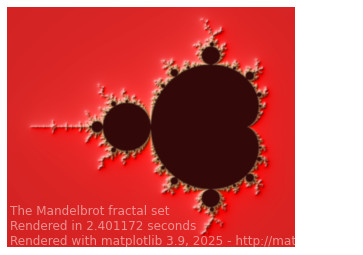

In [4]:
compute(mandelbrot_set_np, gpu=None)

Le premier appel à cupy ne sera pas miraculeux, car il intègre le temps de compilation du code sur le GPU, cela est assez couteux...

Rendered in 0.647558 seconds



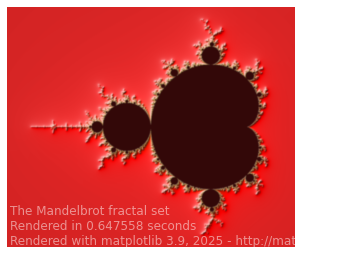

In [5]:
compute(mandelbrot_set_cp, gpu=0)  

Si vous le relancez, le code étant déjà compilé, le temps sera meilleur.

Rendered in 0.374514 seconds



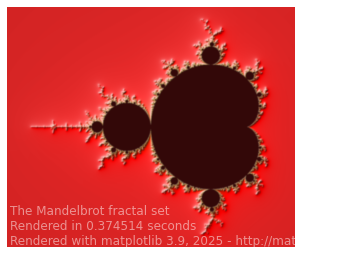

In [8]:
compute(mandelbrot_set_cp, gpu=0)

In [9]:
print("Ratio CPU/GPU:", 2.5/0.37)

Ratio CPU/GPU: 6.756756756756757


Avec très peu de modifications nous avons exécuté le calcul sur GPU. Le véritable changement consiste à avoir renommé `numpy` en `cupy`.  

C'est trop facile avec Python !

La carte graphique offre un gain d'environ x6/7 par rapport à la version *Numpy* sur CPU. C'est déjà bien.  

**Mais c'est un succès très mitigé** si nous regardons le nombre total d'opérations que chaque processeur peut réaliser à la seconde.


Comparons les caractéristiques des 2 processeurs pour connaître leurs performances.

In [10]:
!lscpu | grep -v Drapaux | grep -v Vulnerability

Architecture :                          x86_64
Mode(s) opératoire(s) des processeurs : 32-bit, 64-bit
Address sizes:                          39 bits physical, 48 bits virtual
Boutisme :                              Little Endian
Processeur(s) :                         12
Liste de processeur(s) en ligne :       0-11
Identifiant constructeur :              GenuineIntel
Nom de modèle :                         Intel(R) Core(TM) i7-8700 CPU @ 3.20GHz
Famille de processeur :                 6
Modèle :                                158
Thread(s) par cœur :                    2
Cœur(s) par socket :                    6
Socket(s) :                             1
Révision :                              10
CPU(s) scaling MHz:                     93%
Vitesse maximale du processeur en MHz : 4600,0000
Vitesse minimale du processeur en MHz : 800,0000
BogoMIPS :                              6399,96
Virtualisation :                        VT-x
Cache L1d :                             192 KiB (6 instanc

Le CPU utilisé est un processeur Intel i7 de huitième génération :

* Il possède une fréquence de 4,6Ghz.
* Il dispose de 6 cœurs physiques et 12 hyperthreads, soit 2 hyperthreads par cœur.

Les hyperthreads sont des cœurs virtuels/logiques. Tous les processeurs n'en possèdent pas. Quand un processeur en est doté, un seul hyperthread fonctionne sur le cœur physique à la fois, comme évoqué dans le chapitre de présentation des concepts du parallélisme.  
Les hyperthreads sont utilisés uniquement quand le processeur réalise des opérations d'entrée/sortie : plutôt que de perdre de précieuses millisecondes à patienter pour attendre que le disque dur ait fini d'écrire ce qu'il a en cours et lui envoyer la suite, le processeur bascule sur le second hyperthread et peut ainsi exécuter d'autres tâches pendant cette attente.

Dans le cas d'un calcul numérique comme ici, il n'y a pas de véritable opération d'entrée/sortie, les hyperthreads ne sont pas utilisés.

La fréquence représente le nombre de cycles qu'un processeur peut réaliser en 1 seconde. Ici 4,6 milliards.

Un cycle est le temps qu'il faut au processeur pour changer l'état d'un bit. Dans un ordinateur, en général un bit est représenté par un transistor possédant une tension de 0 ou 5 volts. Si sa tension est nulle, il vaut 0, sinon, il vaut 1. Quand la valeur du bit passe de 0 à 1, sa tension croit progressivement jusqu'à 5 volts. Tant que la tension lue n'est pas égale soit à 0 soit à 5, son état est instable et sa valeur indéterminée. Il ne peut pas être utilisé pour le calcul.

la fréquence représente donc le nombre de changements de bits que le processeur peut faire à la seconde.

Certaines opérations ne demandent qu'un cycle machine, comme inverser l'état des bits d'un registre. D'autres peuvent demander plusieurs cycles. Comme charger un registre avec des données issues de la RAM.

Pour simplifier, disons qu'un cycle représente 1 instruction du processeur.

Nous avons donc un cpu pouvant exécuter: 27.6 milliards d'instructions à la seconde

In [6]:
nb_coeurs = 6
frequence = 4.6 #  en Giga Hertz

nombre_instructions_cpu = nb_coeurs * frequence
print("Nombre d'instructions à la seconde du CPU en milliards:", nombre_instructions_cpu)

Nombre d'instructions à la seconde du CPU en milliards: 27.599999999999998


Regardons maintenant du côté de la carte graphique:

In [12]:
!nvidia-smi

Mon Jan 27 15:09:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.05              Driver Version: 560.35.05      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2070        Off |   00000000:01:00.0  On |                  N/A |
| N/A   48C    P0             31W /  115W |    1114MiB /   8192MiB |      8%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Il s'agit d'une RTX 2070. 
Comme le montrent la commande `deviceQuery` exécutée plus tôt ou [la documentation NVIDIA](https://www.NVIDIA.com/fr-fr/geforce/graphics-cards/compare/?section=compare-20) elle dispose de 2304 cœurs et d'une fréquence maximale de 1,71Ghz.

Soit un total de 3 939.94 milliards d'instructions à la seconde.


In [13]:
nb_coeurs = 2304
frequence = 1.71 #  en Giga Hertz

nombre_instructions_gpu = nb_coeurs * frequence
print("Nombre d'instructions à la seconde du GPU en milliards:", nombre_instructions_gpu)

Nombre d'instructions à la seconde du GPU en milliards: 3939.84


Nous aurions donc pu espérer un rapport de vitesse environ 142 fois plus rapide en faveur du GPU. Nous en sommes loin.

In [14]:
nombre_instructions_gpu / nombre_instructions_cpu

142.74782608695654

~~~~{admonition} Remarque
:class: note

Nous avons comparé le nombre de cycles des processeurs pour comparer leur puissance respective.  
Dans cet exemple les calculs sont réalisés avec des réels 32 bits.  

Il aurait été plus juste d'utiliser les FLOPS ([Floating Point Operation Per Second](https://en.wikipedia.org/wiki/Floating_point_operations_per_second)) comme mesure.  
Les flops représentent le nombre d'opérations sur des réels que peuvent réaliser des processeurs en 1 seconde.

Dans ce dernier cas, le processeur Intel possède des instructions [SIMD - Single Instruction Multiple Data](https://en.wikipedia.org/wiki/Single_instruction,_multiple_data), aussi appelées vectorielles, de type [AVX2](https://en.wikipedia.org/wiki/X86_SIMD_instruction_listings) qui permettent d'exécuter des opérations sur 8 réels 32 bits simultanément en 1 cycle.

~~~bash
bash$ lscpu | grep -i drapaux
Drapaux :                               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss 
ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64
monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm 
abm 3dnowprefetch cpuid_fault epb pti ssbd ibrs ibpb stibp tpr_shadow flexpriority ept vpid ept_ad fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid 
mpx rdseed adx smap clflushopt intel_pt xsaveopt xsavec xgetbv1 xsaves dtherm ida arat pln pts hwp hwp_notify hwp_act_window hwp_epp vnmi md_clear 
flush_l1d arch_capabilities
~~~

Il conviendrait donc de diviser ce ratio par 8. (soit 17.75 fois plus rapide pour le GPU)

Les cartes NVIDIA possèdent aussi des [instructions SIMD pour les modèles ayant les capacités de calcul 3.0 jusqu'à 5.0](https://forums.developer.nvidia.com/t/how-to-use-simd-video-instructions-and-why-is-there-no-32-64-bit-float-version/160220).  Cependant elles ont été retirées pour la plupart à partir de la capacité 5.0. Mais ceci est autre sujet.

Nous reviendrons plus tard sur la notion de capacité de calcul de la carte qui correspond à une nomemclature interne à NVIDIA. Pour information la carte RTX 2070 correspond à la nomemclature 7.5 comme affiché par la commande `deviceQuery` précédente ; elle ne possède que peu d'instructions SIMD (uniquement un jeu réduit pour [la vidéo](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#simd-video-instructions) et les [nombres entiers](https://docs.nvidia.com/cuda/cuda-math-api/cuda_math_api/group__CUDA__MATH__INTRINSIC__SIMD.html)).
~~~~


In [15]:
142/8  # Ratio GPU/CPU en tenant compte des instructions SIMD du processeur

17.75

~~~{admonition} Question : Pourquoi notre test cupy n'a pas montré un tel gain 
:class: hint

Il est en effet plus de 3 fois inférieur au ratio que l'on pourrait espérer ?

Nous allons tenter d'apporter des éléments de réponses avec un autre test réalisé via la librairie PyCuda.

~~~

## Un autre exemple avec PyCuda

Continuons donc, pour assouvir votre soif de connaissances et d'expérimentation de votre carte graphique dernier cri, avec la librairie [PyCuda](https://documen.tician.de/pycuda/index.html).


*PyCuda* est un projet proche de *PyOpenCL*. Elle permet d’utiliser à l’API CUDA (langage C) des cartes NVIDIA depuis Python.  
Elle ne fonctionne qu’avec les cartes NVIDIA.



**PyCuda** ne s'installe pas très facilement si votre toolkit NVIDIA n'est pas bien configuré au niveau du système.

Pensez à vérifier que le compilateur `nvcc` est bien dans le `PATH` système. A défaut, ajoutez-le comme présenté dans le paragraphe sur la compilation.  
N'oubliez pas de redémarrer *Jupyter* pour qu'il ait connaissance de ce changement.

Ensuite, l'installation avec `pip` sera assez facile:

```bash
$ pip install pycuda
Collecting pycuda
...
Successfully built pycuda
Installing collected packages: pycuda
Successfully installed pycuda-<version>
```

**PyCuda** permet d'utiliser la librairie **cuda** directement depuis Python, avec quelques avantages:

* Elle gère la mémoire pour vous, vous n'aurez pas à vous soucier des allocations et libérations de mémoire
* Elle offre une classe GPUArray qui facilite l'échange de données entre le CPU et le GPU
* Elle propose depuis Python un accès à l'intégralité de la librairie **cuda**, mais cela imposera souvent d'écrire des bouts de codes en C qui seront tranmis à la librairie


Avant de commencer à lancer des calculs sur votre GPU il convient de charger puis d'initialiser le driver de la carte graphique:

In [14]:
import pycuda.driver as drv
drv.init()

Nous disposons alors de quelques fonctions pour identifier la configuration du matériel:

In [15]:
drv.Device.count()  # Nombre de GPU disponibles

1

In [16]:
gpu0 = drv.Device(0)  # Accès au premier GPU

In [17]:
gpu0.name()  # Nom de la carte

'NVIDIA GeForce RTX 2070'

In [20]:
gpu0.total_memory()  # mémoire disponible pour le GPU

8144093184

In [21]:
gpu0.pci_bus_id()  # BUS PCI utilisé

'0000:01:00.0'

La méthode `get_attributes` fournira beaucoup d'autres informations:

In [22]:
attributes = gpu0.get_attributes()  # Dictionary containing gpu specifications
for attr, value in attributes.items():
    print(f"{attr} : {value}")

ASYNC_ENGINE_COUNT : 3
CAN_MAP_HOST_MEMORY : 1
CAN_USE_HOST_POINTER_FOR_REGISTERED_MEM : 1
CLOCK_RATE : 1440000
COMPUTE_CAPABILITY_MAJOR : 7
COMPUTE_CAPABILITY_MINOR : 5
COMPUTE_MODE : DEFAULT
COMPUTE_PREEMPTION_SUPPORTED : 1
CONCURRENT_KERNELS : 1
CONCURRENT_MANAGED_ACCESS : 1
DIRECT_MANAGED_MEM_ACCESS_FROM_HOST : 0
ECC_ENABLED : 0
GENERIC_COMPRESSION_SUPPORTED : 0
GLOBAL_L1_CACHE_SUPPORTED : 1
GLOBAL_MEMORY_BUS_WIDTH : 256
GPU_OVERLAP : 1
HANDLE_TYPE_POSIX_FILE_DESCRIPTOR_SUPPORTED : 1
HANDLE_TYPE_WIN32_HANDLE_SUPPORTED : 0
HANDLE_TYPE_WIN32_KMT_HANDLE_SUPPORTED : 0
HOST_NATIVE_ATOMIC_SUPPORTED : 0
INTEGRATED : 0
KERNEL_EXEC_TIMEOUT : 1
L2_CACHE_SIZE : 4194304
LOCAL_L1_CACHE_SUPPORTED : 1
MANAGED_MEMORY : 1
MAXIMUM_SURFACE1D_LAYERED_LAYERS : 2048
MAXIMUM_SURFACE1D_LAYERED_WIDTH : 32768
MAXIMUM_SURFACE1D_WIDTH : 32768
MAXIMUM_SURFACE2D_HEIGHT : 65536
MAXIMUM_SURFACE2D_LAYERED_HEIGHT : 32768
MAXIMUM_SURFACE2D_LAYERED_LAYERS : 2048
MAXIMUM_SURFACE2D_LAYERED_WIDTH : 32768
MAXIMUM_SURFACE

Nous avons maintenant un aperçu de comment nous pouvons interroger le matériel dont nous disposons.  

Utilisons cet exemple issu de la page d'accueil du site de PyCuda afin d'éprouver une nouvelle fois la puissance de ce GPU...  

Ici, le programme présenté utilise un petit bout de code C pour définir la fonction qui sera lancée sur le GPU: en effet, Cuda permet à la base d'exécuter des programmes écrits en langage C.
Aussi, il est souvent nécessaire de devoir écrire quelques fonctions en C avec PyCuda.


Le bout de code ci-après est une petite astuce dans votre notebook pour vous assurer que Python trouvera bien votre compilateur `nvcc` requis pour la suite du TP.

In [23]:
import os 
print(os.environ['PATH'])
os.environ['PATH'] += ':/usr/local/cuda/bin'

/usr/local/cuda/bin:/home/aliquis/miniforge3/envs/JBook/bin:/home/aliquis/miniforge3/condabin:/home/aliquis/.local/bin:/home/aliquis/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


Dans ce programme la fonction `multiply_them` multiplie 2 tableaux de réels, `a` et `b` pour stocker le résultat dans un tableau `dest`

In [7]:
import pycuda.autoinit  # Another way to initialize the GPU driver
import pycuda.driver as drv  # Here it is loaded
from pycuda.compiler import SourceModule  # Use to compile C functions for Cuda using nvcc
import numpy as np

# Mod will compile the C function
mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

# Then the C function is retrieved this way so it can be called directly from Python 
multiply_them = mod.get_function("multiply_them")


Quelques explications:
    
* La fonction C qui est créée est celle qui sera exécutée sur le GPU.  
  On l'appelle *fonction device*.  
  Elle prend 3 tableaux de réels 32 bits en entrée (pointeurs float)  
  Le premier contiendra le résultat, les 2 autres sont les vecteurs que l'on souhaite multiplier.
* Remarquez qu'aucune boucle n'est réalisée pour multiplier tous les éléments des tableaux  
  Au lieu de cela, la fonction récupère l'indice de l'élément qu'elle doit calculer via `ThreadIdx.x`
* La fonction C qui aura été compilée dans la foulée par `SourceModule` est rendue accessible en Python via la méthode `get_function`

~~~{admonition} Comment la fonction itère-t-elle sur tous les éléments du tableau ?
:class: question

En effet, elle ne manipule qu'un élément à l'indice `threadIdx.x`. Il n'y a pas de boucle.

Le concept est le suivant: quand le GPU va lancer le calcul il va lancer cette fonction sur différents cœurs/threads en parallèle. Chaque cœur/thread possède un indice - ici `threadIdx.x` - et s'occupera de la case située à cet indice.

Il n'y a donc pas besoin d'une boucle. Mais il faudra indiquer au GPU combien de fois la fonction devra être lancée: autant qu'il y a d'éléments dans le tableau !
 
~~~

Réalisons le même travail avec numpy:

In [25]:
a = np.random.randn(400).astype(np.float32)  # We create 2 tables of numpy numbers having 400 items
b = np.random.randn(400).astype(np.float32)  # single precision is used as GPU are computing 
                                             # most of the time with float having 32 bits

dest = np.zeros_like(a)  # dest is a table full of zeros and having same size as a !


In [26]:
print(a[:5])
print(b[:5])
print(dest[:5])

[-0.00555495  0.25411418 -0.49110463  0.31549597 -0.17547004]
[0.42375204 0.90399384 0.1391739  0.44877696 1.2170142 ]
[0. 0. 0. 0. 0.]


Mesurons le temps d'exécution de `a * b` avec numpy sur CPU:

In [27]:
%timeit dest = a * b

422 ns ± 5.96 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [28]:
r = a * b
print(r[:5])

[-0.00235392  0.22971766 -0.06834894  0.14158732 -0.21354952]


Là aussi, il n'y a pas de boucle dans notre code. Mais elle existe bien dans la réalité: c'est l'opérateur `*` implémenté dans la classe NDArray de numpy qui la réalise pour nous. Numpy ne travaille que sur 1 seul cœur. La librairie n'est pas parallélisée sur tous les cœurs de la machine.

Dans cet exemple, le résultat devrait être environ, en terme de nombre de cycles, (142 * 6) fois plus rapide en faveur de cupy...

Excepté que nous n'utilisons que 400 cœurs du GPU.

Le ration devrait donc être:

In [5]:
nb_coeurs = 400
frequence = 1.71 #  en Giga Hertz

nombre_instructions_gpu_400 = nb_coeurs * frequence

nb_coeurs = 1
frequence = 4.6 #  en Giga Hertz

nombre_instructions_cpu_1 = nb_coeurs * frequence

nombre_instructions_gpu_400 / nombre_instructions_cpu_1   # 148 fois plus rapide en théorie...

148.69565217391306

Vérifions cela...

In [2]:
import cupy as cp
ac = cp.random.randn(400).astype(cp.float32)  
bc = cp.random.randn(400).astype(cp.float32)  

destc = cp.zeros_like(ac)  # dest is a table full of zeros and having same size as a !

In [3]:
print(ac[:5])
print(bc[:5])
print(destc[:5])

[-1.6642687   0.7745935   1.227624    0.5488435  -0.55261844]
[-1.9712749  -0.49186102 -0.06115467  0.69422895  0.68600804]
[0. 0. 0. 0. 0.]


In [4]:
%timeit destc = ac * bc

10.6 μs ± 46.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [2]:
10.6 / 0.422  # 10us pour cupy contre 422ns soit 0.422us pour numpy...

25.118483412322274

**Mais nous sommes 25 fois plus lent que le CPU ! Cela peut sembler n'avoir aucun sens !**  
Sur 1 seul cœur, le CPU est 25 fois plus rapide que le GPU qui utilise normalement 400 cœurs dans cet exemple !

**Misère... Remboursez-nous cette carte graphique, elle ne semble pas fonctionner correctement !**

Vérifions la mesure avec la fonction `multiply_them`.

Nous allons pouvoir lancer le même calcul sur le GPU avec la fonction précédemment créée.  

* Il convient pour cela de transmettre les tableaux Numpy à la carte graphique, car, rappelez-vous, le GPU travaille dans sa propre mémoire.
  Ceci est réalisé via les fonctions `drv.In` ci-après.
* Pour récupérer le résultat, la fonction `drv.Out` est utilisée afin de transmettre les données de la RAM du GPU vers le CPU
* Les paramètres *block* et *grid* définissent la "matrice" des cœurs de calculs qui seront utilisés.   
  Ces notions seront détaillées dans la section suivante.  
  Ici nous réservons une grille de 400 cœurs/threads.  
* Nous avons un tableau de 400 éléments, les 400 multiplications seront réalisées en parallèle.  
  Sous réserve que la carte dispose de suffisamment de cœurs (elle en a plus de 2000)


In [9]:
import numpy as np
a = np.random.randn(400).astype(np.float32)  # We create 2 tables of numpy numbers having 400 items
b = np.random.randn(400).astype(np.float32)  # single precision is used as GPU are computing 
                                             # most of the time with float having 32 bits

dest = np.zeros_like(a)
print(dest[:5])

multiply_them( drv.Out(dest)
              , drv.In(a)
              , drv.In(b)
              , block=(400, 1, 1)
              , grid=(1, 1) )

print(a[:5])
print(b[:5])
print(dest[:5])

[0. 0. 0. 0. 0.]
[-0.08468395  0.18728326  1.7134982  -1.051074   -0.35594532]
[-0.8216796  -0.07424407  0.8293001  -0.8038413  -1.1592786 ]
[ 0.06958307 -0.01390467  1.4210043   0.84489673  0.4126398 ]


In [10]:
print( sum(a*b - dest) )  # checking that result is good

0.0


Maintenant que nous avons vérifié que le programme fonctionnait correctement, nous pouvons calculer son temps d'exécution:

In [11]:
%timeit multiply_them( drv.Out(dest), drv.In(a), drv.In(b), block=(400, 1, 1), grid=(1, 1) )

164 μs ± 2.29 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
164/0.422  # 388 times slower for the GPU :(

388.6255924170616

**Misère !**  

Mais c'est encore pire ! Avec une fonction écrite en langage C - et il est difficile de faire plus concis, le GPU est cette fois plus de 388 fois plus lent que le CPU.

Mais que se passe-t-il avec cette carte ?

Afin d'obtenir de véritables performances en faveur du GPU, il convient de comprendre un peu plus l'architecture d'un GPU.

## L'architecture d'un GPU

Même si certaines librairies comme *Cupy*, *Numba* ou *PyOpenCL* permettent de lancer des calculs pour GPU de manière *"simplifiée"*, il est important de comprendre l'architecture d'un processeur graphique pour organiser les calculs qu'il devra accomplir.  
A défaut les performances ne seront pas optimales, et, même pire, le temps de calcul pourrait être plus lent que sur CPU, comme nous venons de l'observer.

### La mémoire
Nous l'avons déjà évoqué, mais il bon de le rappeler et préciser:

* Un processeur graphique calcule avec sa propre mémoire interne.
* Il n'utilise pas la mémoire du CPU.

Votre GPU doit donc disposer d'une mémoire suffisante pour calculer avec de grandes matrices/images/vecteurs, enfin, avec des données volumineuses. Sinon vous obtiendrez des *Memory Overflow* et ne pourrez mener à terme vos calculs.

Les échanges de données entre le CPU et le GPU sont lents.  Il convient de les minimiser au maximum, sinon ils viendront diminuer dratisquement vos performances.


Nous avons déjà vu comment obtenir la mémoire dont dispose le GPU:


In [18]:
print( "%s Mega Bytes" % (gpu0.total_memory() // 1024**2))

7766 Mega Bytes


Nous pouvons reprendre la petit calcul du produit des vecteurs `a` et `b` en réalisant nous même le transfert mémoire du CPU vers le GPU afin de mieux mesurer ces temps. 

Dans le calcul réalisé avec la fonction `multiply_them` le temps de transfert des données CPU vers GPU puis GPU vers CPU était inclus dans la mesure. Ce n'était pas le cas avec cupy car les vecteurs `ac`, `bc` et `destc` ont été alloués directement dans le GPU.

Le code cupy était donc plus rapide, et ceci d'un facter x16 par rapport à la fonction native. C'est dire si ce temps de transfert des données est couteux.  

Vérifions cela avec `multiply_them` en créant les vecteurs dans le GPU avant d'appeler la fonction.  



La fonction `mem_alloc` permet d'allouer de la mémoire sur le GPU.  

In [19]:
a_gpu = drv.mem_alloc(a.nbytes)  # Allocating a.nbytes bytes for a gpu array named a_gpu
b_gpu = drv.mem_alloc(b.nbytes)  # Same for b/b_gpu

Nous disposons maintenant de 2 tableaux `a_gpu` et `b_gpu` alloués dans la ram du GPU.  
Il convient maintenant de leur transférer les données des vecteurs numpy `a` et `b`

La fonction  `memcpy_htod` les données du CPU vers le GPU.  

* `h` signifie ici : Host, il s'agit du CPU
* `d` signifie ici : Device, il s'agit du GPU

Host et Device sont les termes dans la terminologie CUDA pour désigner le CPU qui lance les calculs et le GPU qui est le périphérique (device) qui les exécute.  

Nous y reviendrons tout à l'heure.

In [20]:
drv.memcpy_htod(a_gpu, a)  # Copying data from numpy array in RAM to GPU RAM
drv.memcpy_htod(b_gpu, b)  # Same for b

In [21]:
dest_gpu = drv.mem_alloc(a.nbytes)  # Also need to allocate memory for the result

Nous avons aussi alloué la mémoire pour le tableau résultat `dest_gpu`.  
Par contre aucune donnée n'y a été copiée puisqu'il est utilisé pour recevoir le résultat.

Relançons le calcul.

In [22]:
multiply_them( dest_gpu, a_gpu, b_gpu, block=(400, 1, 1), grid=(1, 1) )

Vérifions le résultat en transférant avec la fonction  `memcpy_dtoh` les données du device vers l'hôte.

In [23]:
dest[:] = 0
print(dest[:5])
drv.memcpy_dtoh(dest, dest_gpu)
print(dest[:5])

[0. 0. 0. 0. 0.]
[ 0.06958307 -0.01390467  1.4210043   0.84489673  0.4126398 ]


In [24]:
print(sum(a*b - dest))  # Ok, still good !

0.0


Mesurons le temps d'exécution...

In [25]:
%timeit multiply_them( dest_gpu, a_gpu, b_gpu, block=(400, 1, 1), grid=(1, 1) )

6.22 μs ± 59.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Nous avons gagné et dépassé les performances affichées par cupy. Ce qui est normal, la classe vecteur de cupy ajoute un peu plus de code pour gérer ses structures de données alors que la fonction `multiply_them` est la plus minimaliste possible.

Cela signifie aussi que le temps de transfert des données représentait environ 95% du temps de calul : c'est un temps très couteux qu'il convient de minimiser au mieux.

Mais nous restons 14 fois plus lent que sur le CPU !

In [27]:
6.22/0.422

14.739336492890995

La librairie PyCuda dispose d'une classe **gpuarray** qui permet de manipuler des tableaux cuda à la manière de numpy.  
Elle facilite aussi grandement les échanges mémoires entre CPU et GPU.  
Elle impléménte aussi la majorité des opérateurs numpy, comme `+`, `-`, `/`, `*` ou encore `**`.  

Une fois les vecteurs créés, vous les utilisez comme un tableau numpy.

In [28]:
from pycuda import gpuarray

gpu_a = gpuarray.to_gpu(a)
gpu_b = gpuarray.to_gpu(b)
gpu_dest = gpu_a * gpu_b
cpu_dest = gpu_dest.get()  # transfert GPU array to CPU array of numpy type

In [29]:
gpu_dest[:5]  # Convert gpu_dest to numpy array too

array([ 0.06958307, -0.01390467,  1.4210043 ,  0.84489673,  0.4126398 ],
      dtype=float32)

In [30]:
%timeit  gpu_dest = gpu_a * gpu_b

34.6 μs ± 2.71 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Evidemment cela ne change rien aux mesures observées jusqu'ici...

Clairement, il nous manque encore des éléments pour comprendre comment tirer profit de ces GPU...

En fait il y a plusieurs éléments qui entrent en jeu pour expliquer ces mesures, dont 2 majeurs ici:

* Le code utilisé sur le GPU est généralement compilé par PyCuda au premier appel ce qui vient ternir les performances la première fois.  
  L'utilisation de `%prun` le montrera si vous faites l'expérience dans une nouvelle session.    
  Puis les fois suivantes le code compilé est réutilisé depuis le cache, ce qui améliore nettement les mesures faites sur le GPU.    
  Dans notre cas nous utilisons `%timeit` qui appelle de très nombreuses fois la fonction, donc le temps de compilation n'est plus visible car il est dilué sur l'ensemble des mesures.  
  Il n'explique donc pas ces moindres performances du GPU.  
* La taille des données: ici les données sont de toutes petites taille, elles peuvent résider dans la mémoire cache du CPU ce qui compense largement le manque de cœurs sachant que la fréquence du CPU est 3 fois supérieure à celle du GPU et que le CPU dispose d'instructions SIMD.

Recommençons l'exercice en faisant varier le nombre d'éléments des tableaux a et b et de leurs équivalents gpu_a et gpu_b de 1 à 100_000_000 d'éléments.  

Nous allons pour chaque tableau a/b et gpu_a/gpu_b:
* mesurer le temps de calcul de leur produit
* calculer les ratios temps CPU/GPU et inversement
* tracer ces durées sur un graphique en fonction du nombre d'éléments

~~~{admonition} Remarque
:class: note

Pour utiliser des tableaux d'un milliard d'éléments il faudrait disposer de 12 Go de RAM dans le GPU car nous avons 3 tableaux de réels 32 bits (4 octets) qui doivent tenir dans la RAM de la carte graphique.  Ce n'est pas le cas avec celle utilisée lors de la rédaction de ce TP.

~~~

Dans le code ci après nous réalisons 10 mesures pour chaque tableau afin d'avoir un temps plus précis et conservons la plus petite valeur pour obtenir les meilleurs ratios.

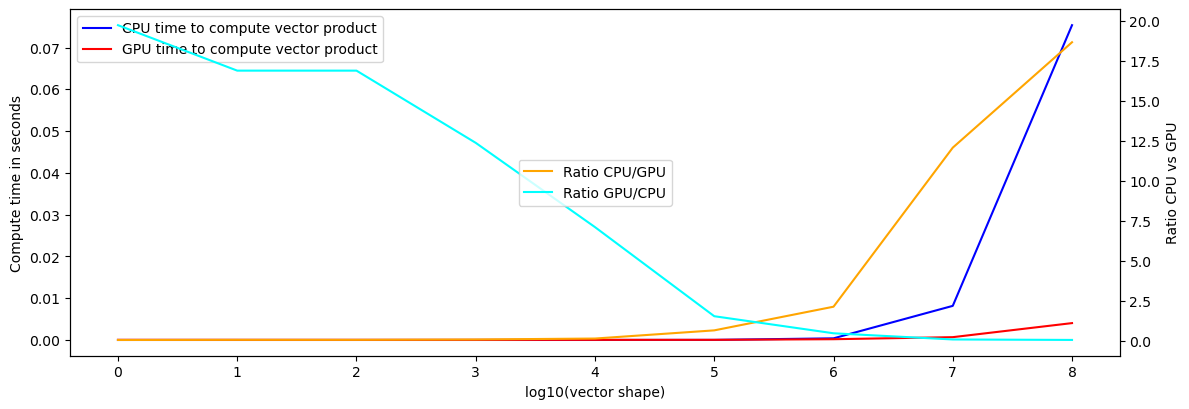

In [31]:
%matplotlib inline

import time
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from pycuda import gpuarray
# from ipywidgets import interactive

cpu_time = []
gpu_time = []
nb_items = []

for n in range(9):
    a = np.random.random(10**n).astype(np.float32)
    b = np.random.random(10**n).astype(np.float32)
    
    nb_items.append(n)

    # move data to gpu memory
    gpu_a = gpuarray.to_gpu(a)
    gpu_b = gpuarray.to_gpu(b)
    gpu_d = gpuarray.empty_like(gpu_a)
    
    cpu = []
    gpu = []

    # Do 10 timings and get min time
    for repeat in range(10):
        start = time.time()
        dest = a * b
        stop = time.time()
        duration = stop - start
        cpu.append(duration)

        start = time.time()
        gpu_d = gpu_a * gpu_b
        stop = time.time()
        duration = stop - start
        gpu.append(duration)

    cpu_time.append(min(cpu))
    gpu_time.append(min(gpu))
        
    
# Displaying
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(nb_items, cpu_time, label="CPU time to compute vector product", c='blue')
ax1.plot(nb_items, gpu_time, label="GPU time to compute vector product", c='red')
ax1.set_ylabel("Compute time in seconds")
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel("Ratio CPU vs GPU")

ax2.plot(nb_items, np.array(cpu_time) / np.array(gpu_time), label="Ratio CPU/GPU", c='orange')
ax2.plot(nb_items, np.array(gpu_time) / np.array(cpu_time), label="Ratio GPU/CPU", c='cyan')
ax2.legend(loc='center')
ax2.tick_params('y', colors='black')

fig.tight_layout()
ax1.set_xlabel('log10(vector shape)')
plt.show()


Il apparaît clairement que sur les tableaux de moins d'un million d'éléments l'avantage est nettement en faveur du CPU. Mais dès que l'on dépasse ce million, le temps de calcul du CPU monte en flèche alors que pour le GPU il reste presque contant du début à la fin.

Et nous finissons par avoir un ratio d'un peu plus de 17.5 fois plus rapide en faveur du GPU ! C'est notre ratio théorique estimé précédemment !  
**Trop fort !** Quand la théorie est confirmée par la pratique, c'est toujours un grand moment de science !


~~~{admonition} Question: Pourquoi le rapport de performance s'inverse vers 1 million d'éléments en faveur du GPU ?
:class: hint

Cela est lié à 2 choses:
* La mémoire cache du CPU
* La grande taille du tableau qui permet d'utiliser tout le potentiel des milliers de cœurs du GPU

---

La mémoire de votre ordinateur est stockée dans des barettes mémoire sur la carte mère. Elle ne réside pas dans le CPU comme nous l'avons vu dans le chapitre sur les concepts du parallélisme.

Cette mémoire est généralement cadencée à une fréquence inférieure à celle du CPU: Imaginons une RAM cadencée à 1Ghz contre 3Ghz pour le CPU.  
Cela signifie qu'en une seconde votre CPU peut effectuer 3 fois plus de cycles que votre RAM. Et c'est problématique.

- Quand le CPU veut incrémenter le contenu d'un octet situé en RAM il va charger dans un de ses registres son contenu pour le modifier, car la RAM ne permet que de stocker des valeurs, pas de calculer directement dessus.  
  Certaines RAM disposent de telles opérations, mais elles sont plus couteuses.
- Puis le CPU incrémente la valeur stockée dans son registre
- Et il la redépose dans la RAM

La durée de ces opérations sera la suivante:
- 1 cycle RAM pour le transfert de l'octet vers le CPU. Cela représente 3 cycles ou le CPU ne fait rien et attend
- 1 cycle de calcul pour le CPU
- 1 cycle RAM pour le transfert du registre dans la RAM. Cela représente 3 cycles ou le CPU ne fait rien et attend

Au total cette opération aura requis 7 cycles du CPU sachant que pendant 6 d'entre eux il attend la fin des opérations dans la RAM.

Donc, si la RAM avait fonctionné à la même fréquence que le CPU l'opération n'aurait duré pour le CPU que 3 cycles, contre 7. Aussi votre CPU va tourner plus de 2 fois moins vite que ce qu'il pourrait faire en raison de la lenteur de la mémoire externe. Et votre ressenti sera une fréquence de 1,5Ghz ! Ce ne sera pas un défaut du CPU mais une trop grande lenteur de votre RAM.

Pour éviter ces attentes inutiles liées au fait que la RAM dispose d'une fréquence inférieure, les CPU modernes possèdent une mémoire interne, dite mémoire cache de type [SRAM](https://fr.wikipedia.org/wiki/M%C3%A9moire_vive_statique) qui est bien plus rapide et permet au CPU de tourner à sa fréquence optimale. Mais elle est bien plus petite: quelques Mo au mieux car elle est stockée directement dans le CPU et qu'il y a peu de place dans la puce - et puis elle est bien plus chère.

~~~

**Donc, tant que le CPU peut faire tourner les données qu'il manipule dans sa mémoire cache, il tourne à pleine fréquence et ses performances sont optimales.**  
Dès que les données à manipuler deviennent plus volumineuses, il fait de nombreux aller-retour avec la mémoire externe et ses performances se dégradent.

Si l'on compte 3 tableaux de 1 million de réels (a, b et dest) en simple précision (4 octets), cela occupe très exactement 12 000 000 d'octets.

Observons la mémoire du CPU avec la commande `lscpu` ou la [documentation officielle du processeur utilisé](https://www.intel.fr/content/www/fr/fr/products/sku/126686/intel-core-i78700-processor-12m-cache-up-to-4-60-ghz/specifications.html) :

In [32]:
!lscpu| grep -i cache

Cache L1d :                             192 KiB (6 instances)
Cache L1i :                             192 KiB (6 instances)
Cache L2 :                              1,5 MiB (6 instances)
Cache L3 :                              12 MiB (1 instance)
Vulnerability L1tf:                     Mitigation; PTE Inversion; VMX conditional cache flushes, SMT vulnerable


Chaque cœur dispose de caches individuels de 192Kox2 puis 1,5Mo et enfin peuvent partager 12Mo supplémentaires.

Nos 3 tableaux d'un million d'éléments peuvent parfaitement tenir dans le cache du processeur, au delà il va chercher les données en RAM et ses performances vont se dégrader alors que le GPU va pouvoir déployer tous ces cœurs sur ses millions de données et tirer pleine partie de son architecture ultra parallélisée !

La commande `hwloc-ls` vous permet d'avoir une vision plus fine de la composition de votre processeur.

```bash
$ hwloc-ls --of console
Machine (31GB)
  Package L#0 + L3 L#0 (12MB)
    L2 L#0 (256KB) + L1d L#0 (32KB) + L1i L#0 (32KB) + Core L#0
      PU L#0 (P#0)
      PU L#1 (P#6)
    L2 L#1 (256KB) + L1d L#1 (32KB) + L1i L#1 (32KB) + Core L#1
      PU L#2 (P#1)
      PU L#3 (P#7)
    L2 L#2 (256KB) + L1d L#2 (32KB) + L1i L#2 (32KB) + Core L#2
      PU L#4 (P#2)
      PU L#5 (P#8)
    L2 L#3 (256KB) + L1d L#3 (32KB) + L1i L#3 (32KB) + Core L#3
      PU L#6 (P#3)
      PU L#7 (P#9)
    L2 L#4 (256KB) + L1d L#4 (32KB) + L1i L#4 (32KB) + Core L#4
      PU L#8 (P#4)
      PU L#9 (P#10)
    L2 L#5 (256KB) + L1d L#5 (32KB) + L1i L#5 (32KB) + Core L#5
      PU L#10 (P#5)
      PU L#11 (P#11)
```

 Elle propose même un aperçu graphique.

~~~{figure} images/hwloc-ls_i78700.png
:width: 800px
:align: center
~~~

### Fonctions ElementwiseKernel

Nous avons utilisé la classe *gpu_array* qui facilite l'usage des tableaux pour le gpu, mais en utilisant les fonctions dites *ElementwiseKernel* fournies par CUDA nous pouvons encore améliorer les choses.

Ces fonctions sont des fonctions C, très courtes, très rapides conçues pour ne travailler que sur un seul élément, indépendamment des autres, ce qui permet des optimisations très avancées du compilateur.

In [33]:
from pycuda.elementwise import ElementwiseKernel

gpu_mul_ker = ElementwiseKernel(
    "float *in1, float *in2, float *out",
    "out[i] = in1[i]*in2[i];",
    "gpu_mul_ker"
)

*gpu_mul_ker* est une fonction C :

* Elle prend 3 tableaux de réels simple précision en paramètres
* Les 2 premiers sont les tableaux à multiplier
* Le dernier contiendra le résultat
* Le code tient sur une ligne, le paramètre `i` est géré par CUDA, il s'agit du cœur qui fera le calcul

La fonction retrournée peut être utilisée avec des tableaux situés dans la RAM du GPU

In [34]:
a = np.random.random(10**6).astype(np.float32)
b = np.random.random(10**6).astype(np.float32)

# move data to gpu memory
gpu_a = gpuarray.to_gpu(a)
gpu_b = gpuarray.to_gpu(b)
gpu_d = gpuarray.empty_like(gpu_a)

In [35]:
# vérifions le résultat
gpu_mul_ker(gpu_a, gpu_b, gpu_d)
gpu_d - gpu_a*gpu_b

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

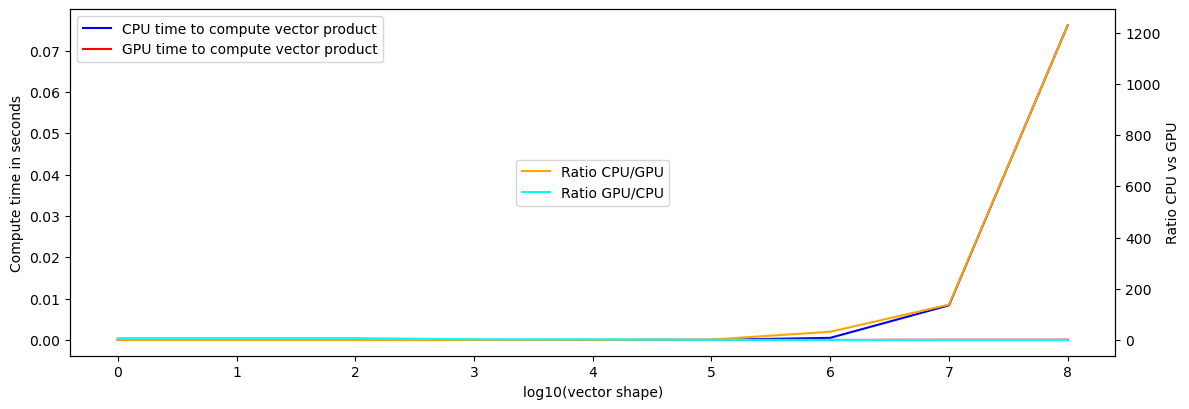

In [36]:
%matplotlib inline

import time
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from pycuda import gpuarray
# from ipywidgets import interactive

cpu_time = []
gpu_time = []
nb_items = []

for n in range(9):
    a = np.random.random(10**n).astype(np.float32)
    b = np.random.random(10**n).astype(np.float32)
    
    nb_items.append(n)

    # move data to gpu memory
    gpu_a = gpuarray.to_gpu(a)
    gpu_b = gpuarray.to_gpu(b)
    gpu_d = gpuarray.empty_like(gpu_a)
    
    cpu = []
    gpu = []

    # Do 10 timings and get min time
    for repeat in range(10):
        start = time.time()
        dest = a * b
        stop = time.time()
        duration = stop - start
        cpu.append(duration)

        start = time.time()
        gpu_mul_ker(gpu_a, gpu_b, gpu_d)
        stop = time.time()
        duration = stop - start
        gpu.append(duration)

    cpu_time.append(min(cpu))
    gpu_time.append(min(gpu))
        
    
# Displaying
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(nb_items, cpu_time, label="CPU time to compute vector product", c='blue')
ax1.plot(nb_items, gpu_time, label="GPU time to compute vector product", c='red')
ax1.set_ylabel("Compute time in seconds")
ax1.legend()

ax2 = ax1.twinx()
ax2.set_ylabel("Ratio CPU vs GPU")

ax2.plot(nb_items, np.array(cpu_time) / np.array(gpu_time), label="Ratio CPU/GPU", c='orange')
ax2.plot(nb_items, np.array(gpu_time) / np.array(cpu_time), label="Ratio GPU/CPU", c='cyan')
ax2.legend(loc='center')
ax2.tick_params('y', colors='black')

fig.tight_layout()
ax1.set_xlabel('log10(vector shape)')
plt.show()


Cette fois nous mesurons la toute puissance de la carte graphique qui est plus de 1_000 fois plus rapide que le CPU. 

Sur les tableaux de moins d'un million d'éléments le CPU a toujours le dessus. Ce n'est plus visible en raison de l'échelle mais si vous diminuez la valeur de N, vous verrez que cela n'a pas changé.

Par contre dès que nous dépassons le million d'éléments, le ratio explose en faveur du GPU qui est environ 1200 fois plus rapide que le CPU !

~~~{admonition} Utilisez les GPU avec de très grandes volumétries de données
:class: warning

Pour vraiment bénéficier de l'architecture massivement parallèle de ces processeurs il faut pouvoir effectuer des calculs très nombreux en parallèle, sinon ils perdent tout leur intérêt.

C'est la conclusion à retenir !

En dessous d'un million d'éléments/calculs parallélisables un GPU ne sera probablement pas plus intéressant qu'un CPU.

~~~

### Noyaux (Kernels), Threads, Blocks, et Grilles (Grids)

L'architecture matérielle d'un GPU est différente d'un CPU.

#### CPU

Nous savons qu'un CPU possède des cœurs, ou unités de calcul autonomes, qui peuvent se décomposer en threads, en général 2. Le CPU possède une mémoire cache décomposée en niveau de quelques Ko ou Mo. Une partie de cette mémoire cache est propre à chaque cœur, tandis que le dernier niveau est partagé par tous les cœurs. Cette mémoire est chargée avec les données de la RAM via des bus de données PCI. Ce qui est une source de ralentissement du CPU.

* Chaque cœur du CPU est autonome
* Dans un même cœur un seul thread est actif à la fois, et quand il est en attente de données (mémoire, disque, réseau, ...), l'autre thread prend la main.


#### GPU

Sur les cartes NVIDIA, l'architecture logique est basée sur la notion de **kernel**, **thread**, **blocks** et **grids**.  

~~~{figure} images/grid-of-thread-blocks.png  
:width: 600px
:align: center

Source* [Wikipédia/NVIDIA](https://en.wikipedia.org/wiki/Thread_block_(CUDA_programming)#/media/File:Block-thread.svg) threads, blocs et grille
~~~

Nous les nommerons parfois avec la terminologie française : noyau, fil d'exécution/fonction, bloc et grille.

* Un **kernel** ou noyau cuda est une fonction parallélisée qui peut être lancée directement depuis le processeur hôte (le CPU) sur le **device** (le GPU).  
  Elle a pour but de lancer les calculs sur l'ensemble de la grille via des fonctions device.
* Une fonction **device** est une fonction appelée par la fonction du kernel (ou une autre fonction device).  
 Ces fonctions peuvent être comparées aux fonctions classiques d'un programme C, excepté qu'elles sont exécutées sur le GPU et initiées par une fonction kernel (exécutée par le CPU).
* Un **thread** est une fonction qui s'exécute sur un des cœurs du GPU.  
  Un thread exécute donc une fonction device. 
* Un **bloc/block** est un groupe de threads (dans la philosophie ils sont semblables aux chunks de dask si vous connaissez cette librairie)
* Une **grille/grid** est un groupe de blocks (dans la philosophie la grille est semblable au tableau dask composé de chunks)

Votre carte graphique dispose de milliers de cœurs. 2304 pour la carte RTX2070 utilisée dans notre exemple.

Si vous devez incrémenter de 1 chaque valeur d'un tableau disposant d'un million d'éléments, vous n'avez pas assez de cœurs pour chacune des cases.

L'idée est donc de découper ce tableau (la grille) en blocs: 
* Chaque bloc possède un nombre de cœurs et travaillera sur une portion du tableau
* Et les cœurs passeront de bloc en bloc pour traiter l'ensemble de la grille

Par exemple si vous disposez d'une carte avec 1000 cœurs, vous pourriez faire des blocs de 100 cœurs chacun. Avec 10 blocs vous utiliseriez tous vos cœurs.

Votre tableau serait alors composé de 10_000 blocs et comme vous avez 1000 cœurs, vous pourriez lancer vos calculs en parallèle par paquets de 10 blocs à la fois et répéter ainsi 1000 fois l'opération.

C'est ainsi que fonctionnent les cartes graphiques.

~~~{admonition} Mais que de questions...
:class: hint

* Comment choisir le découpage de ma grille en blocs et de mes blocs en threads ?
* Il y a-t-il des limites pour le nombre de blocs dans une grille, de threads/cœurs dans un bloc ? 
* Combien de blocs peut-on lancer simultanément en parallèle ?

Ce sont de bonnes questions car ces éléments dépendent des spécifications de votre carte graphique.  
Vous trouverez les chiffres relatifs à votre carte dans le tableau [compute capablity](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#features-and-technical-specifications-technical-specifications-per-compute-capability) de la documentation cuda.

Mais les questions les plus redoutables sont peut-être celles-là : 
* Comment utiliser au mieux mes X cœurs si le nombre d'éléments de mon tableau n'est pas multiple de X, disons qu'il vaut X+1 ,.5X ou 2X-1 ?
* Comment découper ma grille dans ce cas ?

---

La réponse suit dans l'exemple ci-après.
~~~

#### Streaming Multiprocessors (SM)

Un Streaming Multiprocessor représente un ensemble de cœurs qui pourront traiter un même flux de données. C'est un peu le nombre de blocs que vous pourriez lancer simultanément.

L'attribut *MULTIPROCESSOR_COUNT* de la carte graphique indique le nombre de SM dont elle dispose:  


In [37]:
gpu0 = drv.Device(0) 
gpu0.get_attribute(drv.device_attribute.MULTIPROCESSOR_COUNT)  # String 'MULTIPROCESSOR_COUNT' is not allowed

36

La carte peut donc traiter 36 flux en parallèle.  

Le nombre de cœurs de chaque SM est défini par les [capacités de calcul](https://docs.NVIDIA.com/cuda/cuda-c-programming-guide/index.html#compute-capability) de votre carte graphique.  

Ces capacités sont définies par un numéro de version qui précise les fonctionnalités supportées par le matériel.

In [38]:
gpu0.compute_capability()

(7, 5)

In [39]:
print(gpu0.get_attribute(drv.device_attribute.COMPUTE_CAPABILITY_MAJOR))
print(gpu0.get_attribute(drv.device_attribute.COMPUTE_CAPABILITY_MINOR))

7
5


La version des capacités de cette carte graphique est donc 7.5.

Pour connaître les fonctionnalités associées il faut se référer à la [documentation CUDA](https://docs.NVIDIA.com/cuda/cuda-c-programming-guide/index.html#compute-capabilities).  

La [capacité de calcul 7.5](https://docs.NVIDIA.com/cuda/cuda-c-programming-guide/index.html#compute-capability-7-x
), qui correspond à l'architecture Turing, permet d'utiliser 64 cœurs par SM pour des calculs sur des réels en simple précision et 32 cœurs par SM pour des calculs sur des réels en double précision.  




Soit un total de 2304 cuda cores pour calculer sur des réels simple précision.  
C'est bien ce que précise la page de présentation de la carte graphique [RTX 2070](https://www.NVIDIA.com/fr-fr/geforce/graphics-cards/rtx-2070/)

In [40]:
print(36*64) # We find the 2304 cuda cores displayed on NVIDIA RTX 2070 web page

2304


#### Threads

Un Thread est une suite d'instructions qui sont exécutées sur un seul cœur. Un thread n'est pas un cœur.  C'est une fonction.  Le GPU peut recevoir plus de threads qu'il ne possède de cœurs, tout comme un CPU exécute plus de programmes qu'il n'a de cœurs.

#### Blocks

Les Threads sont exécutés dans des unités abstraites appelées blocs. A l'intérieur d'un bloc le thread peut être indexé par une deux ou trois dimensions : `threadIdx` `.x`, `.y` et `.z`

Un block ne peut pas contenir plus de 1024 Threads.

#### Grids

Les blocs sont quant-à eux exécutés dans d'autres unités abstraites appelées grilles.  Un bloc est indexé tout comme le Thread par 3 dimensions dans la grille : `blockIdx` `.x`, `.y` et `.z`

#### Première mise en œuvre

Illustrons ce fonctionnement avec la librairie [Numba](http://numba.pydata.org/).  
Comme nous l'avons vu dans [Utiliser des instructions SIMD avec Python](exercices/simd/compilation_simd.ipynb), la librairie *Numba* permet de compiler des fonctions Python et sait tirer parti des jeux d'instructions SIMD quand votre CPU en dispose.

Et elle sait aussi compiler pour GPU avec le decorateur `@cuda.jit` si vous disposez d'une carte graphique NVIDIA. 

Nous allons calculer la fractale de mandelbrot avec un autre exemple de code que nous compilerons grâce à numba sur CPU (déjà vu dans le TP sur la compilation Just In Time) puis sur GPU.

Dans un premier temps nous allons occulter la question la plus délicate : "Et si mon nombre de cœurs n'est pas multiple de mon nombre de pixels" en fabriquant une image qui respecte ces proportions.

Nous allons aussi ignorer les questions concernant les limites du nombre de blocs dans une grille...

Nous savons que nous disposons de 1024 cœurs au maximum par bloc. Nous créerons des blocs de cette taille.

Commençons par dessiner la fractale puis compilons-là sur CPU.

Reprenons l'exemple de la fractale de Mandelbrot dont le code a été repris de l'article [Massively parallel programming with GPUs](https://people.duke.edu/~ccc14/sta-663/CUDAPython.html#recreational) et que l'on retrouve sur de nombreux autres sites.

In [41]:
import numpy as np
from timeit import default_timer as timer 
import matplotlib.pyplot as plt

# color function for point at (x, y)
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    for x in range(width):
        real = xmin + x*pixel_size_x
        for y in range(height):
            imag = ymin + y*pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x]  = color

Mandelbrot created on CPU in 5.265139 s


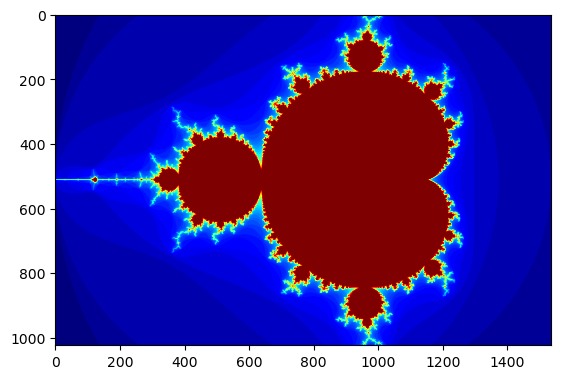

In [42]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt = timer() - start

print ("Mandelbrot created on CPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  
# https://matplotlib.org/examples/color/colormaps_reference.html
# je vous laisse choisir une belle palette de couleurs, je n'arrive pas à me décider

5 secondes pour calculer une image de 1024 lignes par 1536 colonnes en pur Python interprété. Ce n'est pas si mal.

Nous pouvons compiler très facilement ce code pour CPU avec numba en ajoutant simplement le décorateur `@numba.jit` devant chaque fonction.

Celle-ci sera alors transformée pour être compilée lors du premier appel, puis aux appels suivants le code compilé sera utilisé.  

Le premier appel est donc toujours plus lent en raison du temps de compilation.  L'utilisation de `%timeit` est plus pertinente pour des mesures de temps : cela dilue le temps de compilation entre tous les appels.

In [43]:
import numba

# color function for point at (x, y)
@numba.jit(nopython=True)
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

@numba.jit(nopython=True)
def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    for x in range(width):
        real = xmin + x*pixel_size_x
        for y in range(height):
            imag = ymin + y*pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x]  = color

Mandelbrot created on CPU in 0.333542 s


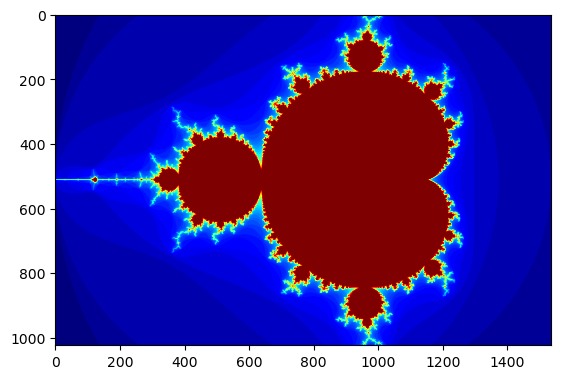

In [44]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt = timer() - start

print ("Mandelbrot created on CPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  


Relançons une seconde fois le code pour ne plus compter le temps de compilation:

Mandelbrot created on CPU in 0.097677 s


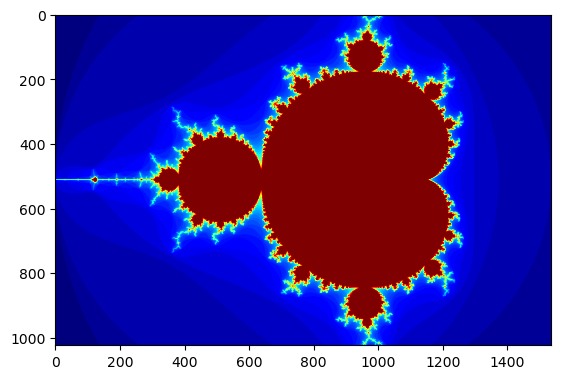

In [45]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt = timer() - start

print ("Mandelbrot created on CPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  


In [46]:
5 / 0.1  # environ 50 fois plus rapide

50.0

Sans mesurer le temps de compilation, le code va 50 fois plus vite.

Mais *numba* permet de faire encore mieux: 
* Les appels à la fonction `mandel`, laquelle calcule la couleur d'un pixel, sont indépendants les uns des autres
* Numba peut les paralléliser avec l'option `parallel=True` transmise au décorateur
* Et l'utilisation de la fonction [prange](https://numba.readthedocs.io/en/stable/user/parallel.html?highlight=prange#explicit-parallel-loops) pour Parallel-Range à la place de `range` qui précise que le contenu de la boucle peut être parallélisé sur différents cœurs.

Nous avons 6 cœurs physiques, nous pourrions aller 6 fois plus vite encore !

#### Exercice

Nous pouvons gagner encore plus en demandant à numba de paralléliser les appels à mandel avec l'option `@numba.jit(parallel=True)`

Essayez de le faire...

In [48]:
# A vous de jouer !


~~~~{admonition} Solution
:class: dropdown tip

```python
import numba

# color function for point at (x, y)
@numba.jit(nopython=True)
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

@numba.jit(parallel=True, nopython=True)
def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    for x in numba.prange(width):
        real = xmin + x*pixel_size_x
        for y in numba.prange(height):
            imag = ymin + y*pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x]  = color
```  

~~~~

Mandelbrot created on CPU in 0.375268 s


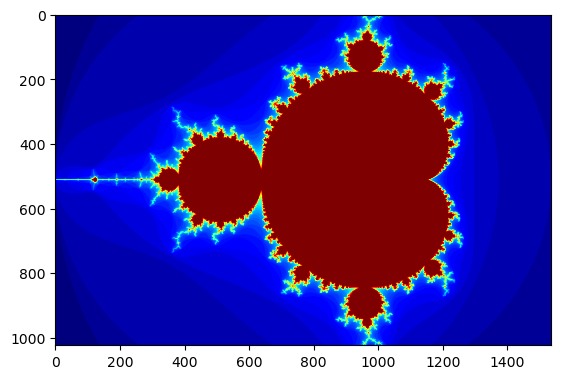

In [49]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt = timer() - start

print ("Mandelbrot created on CPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  


Et une seconde fois, pour ne pas compter le temps de compilation:

Mandelbrot created on CPU in 0.017792 s


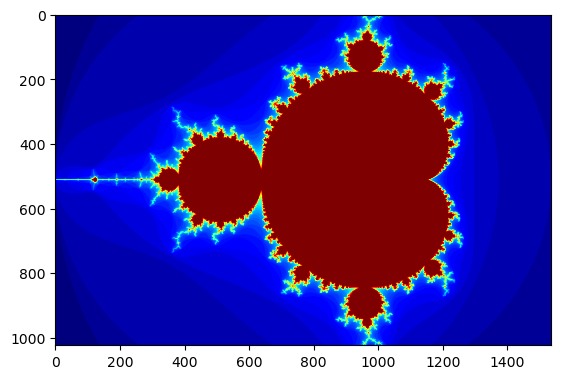

In [50]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt = timer() - start

print ("Mandelbrot created on CPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  


In [52]:
5 / 0.017

294.11764705882354

Nous frolons le ratio théorique de 50 * 6 = 300 fois plus rapide que la version originale en pur Python !   
Trop trop fort quand la pratique du matériel respecte la théorie !  

N'est-ce pas ?

**Nous allons maintenant compiler ces fonctions avec Numba pour CUDA/NVIDIA.**

Avant d'utiliser numba+cuda nous devons libérer le context d'exécution - notion qui sera abordée avec le TP PyOpenCL/PyCUDA - pris par PyCuda sur le GPU car il va gêner le fonctionnement de numba avec une erreur de type *Non Primary Context*

In [53]:
ctx = drv.Context.get_current()
drv.Context.detach(ctx)

Nous pouvons maintenant continuer.

La fonction *mandel* est appelée pour chaque pixel de l'image. Ce sera notre thread qui sera exécuté sur chacun des cœurs. 

Il suffit de la préfixer par le décorateur `@cuda.jit` et de lui passer le paramètre `device=True` qui signifie qu'elle sera utilisée comme fonction *device*, c'est à dire s'exécutant sur le GPU.  

In [54]:
from numba import cuda
import numpy as np
from timeit import default_timer as timer

@cuda.jit(device=True)
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

Voici qui est fait pour la première. Ce n'est pas plus compliqué que pour le CPU.

La seconde fonction est la fonction qui lance la fonction *device*. C'est notre fonction kernel qui sera exécutée sur l'hôte.  
La version compilée sera exécutée pour chaque thread de la grille cuda.

Une fois décorée, son invocation est particulière car elle va être exécutée pour chacun des threads:

```python
<fonction kernel>[grid_dim, block_dim](<params>)
```

* `grid_dim` est un tuple indiquant le nombre de blocs par grille en colonnes et lignes (et profondeur si besoin).  
  **ATTENTION** Cuda utilise les colonnes en première dimension, contrairement à numpy qui utilise les lignes.
* `bloc_dim` est un tuple indiquant le nombre de threads par bloc



Il convient donc de définir la structure de notre grille et de nos blocs.

Nous avons choisi de travailler avec une image dont les dimensions sont compatibles avec la taille maximale des blocs dans ce premier exemple, pour plus de simplicité.

Nous savons que nous ne pouvons pas utiliser plus de 1024 threads par bloc.
Ceci permet d'avoir des blocs carrés de 32x32, mais nous aurions pu chosir 64x16 ou tout autre couple dont le produit est 1024.


Si nous restons sur des blocs carrés (32x32), sachant que l'image fait 1536 colonnes et 1024 lignes, nous pouvons alors définir une grille de (48 blocs en colonnes et 32 et lignes)

In [55]:
1536 / 32, 1024 / 32

(48.0, 32.0)

Maintenant, il convient de restructurer le code de la fonction kernel.

Celle-ci, auparavant, utilisait 2 boucles imbriquées pour parcourir toutes les colonnes puis les lignes de l'image et appeler la fonction *mandel* pour chaque pixel ainsi parcouru.

Avec Cuda, elle sera appelée pour chaque thread de chaque bloc de la grille. Ces boucles ne sont plus nécessaires et doivent disparaître.  
Nous devons donc transformer le code pour calculer les coordonnées du pixel en fonction des coordonnées du thread dans le bloc et du bloc dans la grille.

* Les variables `cuda.threadIdx.x` et `cuda.threadIdx.y`  contiennent les coordonnées du thread dans le bloc.  
  De 0 à 31 dans notre cas
  
* Les variables `cuda.blockIdx.x` et `cuda.blockIdx.y`  contiennent les coordonnées du bloc dans la grille.  
  De 0 à 47 dans notre cas pour les colonnes et de 0 à 31 pour les lignes.
  
* Les variables `cuda.blockDim.x` et `cuda.blockDim.y`  contiennent les dimensions du bloc.
  Dans notre cas : 32 colonnes et 32 lignes
  
Avec ces varibles nous pouvons donc reconstituer les coordonnées du pixel sur lequel la fonction device est exécutée.



In [56]:
# Son code peut être transformé ainsi:
@cuda.jit()
def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    tx = cuda.threadIdx.x  # abscisse de 0 à 31 du thread dans le block
    ty = cuda.threadIdx.y  # idem en ligne pour l'ordonnée
    bx = cuda.blockIdx.x   # abscisse de 0 à 47 du bloc dans la grille
    by = cuda.blockIdx.y   # ordonnée de 0 à 31 du bloc dans la grille
    
    # Block width, i.e. number of threads per block
    bw = cuda.blockDim.x  # largeur du bloc : nombre de threads en colonnes dans le bloc
    bh = cuda.blockDim.y  # longueur du bloc : nombre de threads en lignes dans le bloc

    # Recalculons les valeurs de x, y, imag et real avec les coordonnées des threads/blocs
    """
    # Que fait le code original ?
    for x in range(width):  # Il parcourt les colonnes de l'image avec x
        real = xmin + x*pixel_size_x  # Puis il calcule real en fonction de l'abscisse x dans l'image
        for y in range(height):  # Pour chaque colonne il parcourt les lignes
            imag = ymin + y*pixel_size_y  # Puis il calcule imag en fonction de l'ordonnée y dans l'image
            color = mandel(real, imag, iters)  # et appelle mandel pour chaque pixel avec real et imag
            image[y, x]  = color
    """
    # Maintenant, cette fonction sera exécutée sur un cœur, via un thread, pour chaque thread de chaque bloc de la grille
    # la position du cœur/thread dans son bloc et du bloc dans la grille indiqueront les coordonnées du pixel calculé
    # l'abscisse devient : position en X du thread dans le bloc + position du bloc en X dans la grille * largeur du bloc en colonne

    # Par exemple, le 36ème pixel (abscisse x=35)  aura pour abscisse de thread 3 dans le bloc 1 dont la largeur est 32 : 3 + 1 * 32 = 35
    x = tx + bx * bw 
    y = ty + by * bh

    real = xmin + x*pixel_size_x
    imag = ymin + y*pixel_size_y
    
    image[y, x]  = mandel(real, imag, iters)
    

Ici le code est vraiment très différent, c'est une fonction *elementwize* qui s'applique élément par élément.  

Pour compiler votre code Python avec Numba sur GPU il faut vraiment passer par cette étape de restructuration/atomisation du code par élément du tableau.  
Ceci le rend moins portable, mais pas plus long.



L'effort intellectuel n'est pas simple, prenez le temps de dessiner ce qui se passe dans le code si vous avez du mal à le comprendre.

Maintenant, exécutons-le pour vérifier que cela fonctionne bien et mesurer s'il mérite la peine que nous nous sommes donnés...

Mandelbrot created on GPU in 0.219687 s


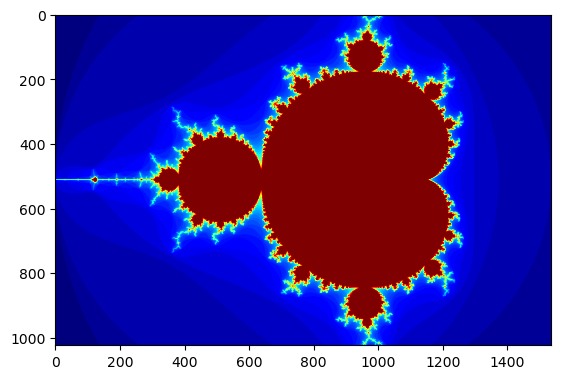

In [57]:
import matplotlib.pyplot as plt
gimage = np.zeros((1024, 1536), dtype=np.uint8)
blockdim = (32, 32)
griddim = (48, 32)  # la grille utilise les colonnes en 1ere coordonnée
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
d_image = cuda.to_device(gimage)
create_fractal[griddim, blockdim](xmin, xmax, ymin, ymax, d_image, iters)
gimage = d_image.copy_to_host()
dt = timer() - start

print("Mandelbrot created on GPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  

N'oubliez pas la seconde exécution pour ne pas compter le temps de compilation...



Mandelbrot created on GPU in 0.006086 s


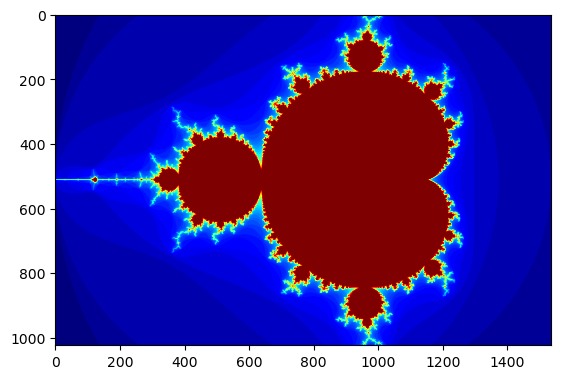

In [58]:
import matplotlib.pyplot as plt
gimage = np.zeros((1024, 1536), dtype=np.uint8)
blockdim = (32, 32)
griddim = (48, 32)  # la grille utilise les colonnes en 1ere coordonnée
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
d_image = cuda.to_device(gimage)
create_fractal[griddim, blockdim](xmin, xmax, ymin, ymax, d_image, iters)
gimage = d_image.copy_to_host()
dt = timer() - start

print("Mandelbrot created on GPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  

Nous sommes près de 600 fois plus rapide que le code python d'origine, et cela inclut le temps de transfert CPU-GPU qui est couteux.

In [59]:
5 / 0.006

833.3333333333334

Si vous souhaitez juste mesurer le temps de la fonction `create_fractal` seule il faut savoir que son appel n'est pas bloquant. Pour votre CPU le GPU est un co-processeur, un périphérique, il lui transmet les ordres et continue sa vie sans attendre le retour.

Donc `%timeit create_fractal[griddim, blockdim](xmin, xmax, ymin, ymax, d_image, iters)` seul n'indiquerait que le temps de lancement de la fonction, même si elle prend des heures à s'exécuter.   
Il faut appeler la fonction `cuda.synchronize()` pour demander au CPU d'attendre la fin des tâches du GPU.

In [60]:
%%timeit 
create_fractal[griddim, blockdim](xmin, xmax, ymin, ymax, d_image, iters)
numba.cuda.synchronize()

2.72 ms ± 20.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
5 / 0.0027  # 1800 fois plus rapide ! Merci numba.

1851.8518518518517

Si après le calcul vous transférez des données du GPU au CPU cela bloque aussi votre CPU sur l'attente du résultat et les temps affichés sont alors fiables.

Nous avons maintenant un code plus de 1700 fois plus rapide que celui initialement réalisé en pur python. Cela valait le déplacement...


Magnifique ! 

Mais, maintenant, **comment dimensionner la grille si le tableau n'est pas multiple du nombre de cœurs** ?


D'autant plus que dans notre exemple nous utilisons des blocs de 1024 cœurs, or nous avons 2304 cœurs, cela signifie que nous ne pouvons faire que 2 blocs et potentiellement 280 cœurs ne sont pas utilisés.

Notre découpage n'est pas idéal.



### Bien utiliser les Streaming Multiprocessors (SM)

Le code fonctionne bien mais n'est pas encore parfait: **nous ne gérons pas correctement les processeurs de flux**

Le code exécuté sur la carte GPU l'est au travers des SM qui ne peuvent utiliser qu'un nombre maximal (puissance de 2 - à vérifier)  de threads.  Le nombre de SM est aussi limité.

D'autre part, ici tout s'est bien passé car la taille de l'image est multiple du nombre de threads par bloc. Mais comment gérer notre problème si l'image possède une ligne et une colonne de plus ?

L'article [Writing cuda kernels](https://github.com/ContinuumIO/gtc2019-numba/blob/master/4%20-%20Writing%20CUDA%20Kernels.ipynb) de la présentation *GTC Numba* l'explique.

Pour comprendre l'algorithme à mettre en œuvre dans ce cas, nous allons imaginer cette configuration très simple:

* Une carte graphique :
    * dotée de 6 cœurs uniquement
    * pouvant totaliser des blocs d'au plus deux threads par sm
    * ne pouvant dépasser 3 SM
* Une matrice de 11 colonnes et 2 lignes sur laquelle nous souhaitons appliquer un calcul elementwise

L'idée va être la suivante:
* On crée a minima autant de blocs qu'il y a de SM, donc 3  ici.
  Que nous nommons ici B0, B1 et B2, ils représentent la grille !  
* On choisit une disposition des threads dans un bloc qui semble cohérente avec la matrice, dans notre schéma ci-dessous : 2 colonnes, 1 ligne

Avec 3 blocs de 2 threads, cela fait 6 threads dans la grille pour 22 éléments:

* Le bloc B0 (en vert) possède 2 threads numérotés t0, t1 dans celui-ci
* Le bloc B1 (en jaune) possède 2 threads numérotés t0, t1 dans celui-ci
* Le bloc B2 (en bleu) possède 2 threads numérotés t0, t1 dans celui-ci

~~~{figure} images/sm-blocks-threads-0.png
:align: center;
:width: 800px;

3 blocs de 2 threads
~~~

**La grille est plus petite que la matrice à calculer !**    
Beaucoup d'éléments passeraient à la trappe si nous nous arrêtions là...

Aussi chaque thread ne s'occupera pas dans son bloc que d'un seul élément du tableau mais de plusieurs:

Dans un bloc, chaque thread s'occupera:
* De l'élément qu'il désigne
    * Le thread t0 du bloc B0 s'occupera de l'élément en 0,0  
    * Le thread t1 du bloc B0 s'occupera de l'élément en 1,0  # colonne d'abord avec CUDA
    * Le thread t0 du bloc B1 s'occupera de l'élément en 2,0
    * Le thread t1 du bloc B1 s'occupera de l'élément en 3,0
    * Le thread t0 du bloc B2 s'occupera de l'élément en 4,0
    * Le thread t1 du bloc B2 s'occupera de l'élément en 5,0
* Mais aussi des éléments situés à la même position décalés de la hauteur et largeur de la grille en éléments (6, 1) tant que les dimensions de la matrice ne sont pas dépassées
    * Le thread t0 du bloc B0 s'occupera donc aussi des éléments (0, 1), (6, 0) et (6, 1)
    * Le thread t1 du bloc B0 s'occupera donc aussi des éléments (1, 1), (7, 0) et (7, 1)
    * ...
    * Le thread t1 du bloc B2 s'occupera donc aussi de l'élément (5, 1) et ce sera tout car après il serait hors de la matrice

~~~{figure} images/sm-blocks-threads.png
:align: center;
:width: 800px;

3 blocs de 2 threads
~~~

Voici l'exemple de *writing cuda kernels* qui additionne deux vecteurs de 100 000 éléments, nombre d'éléments qui n'est pas multiple du nombre de cœurs de la carte...

In [62]:
from numba import cuda

@cuda.jit
def add_kernel(x, y, out):
    tx = cuda.threadIdx.x # this is the unique thread ID within a 1D block
    bx = cuda.blockIdx.x  # Similarly, this is the unique block ID within the 1D grid

    block_width = cuda.blockDim.x  # number of threads per block
    grid_width = cuda.gridDim.x    # number of blocks in the grid
    
    start = tx + bx * block_width
    step_x = block_width * grid_width

    # assuming x and y inputs are same length
    for i in range(start, x.shape[0], step_x):
        out[i] = x[i] + y[i]

In [64]:
import cupy as cp

n = 100_000
x = cp.arange(n).astype(np.float32)
y = 2 * x
out = cp.empty_like(x)

threads_per_block = 64
blocks_per_grid = 36  # Utilisation de 30 SM

add_kernel[blocks_per_grid, threads_per_block](x, y, out)
print(out[:10])
print(out[-10:])


[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27.]
[299970. 299973. 299976. 299979. 299982. 299985. 299988. 299991. 299994.
 299997.]


Ici le nombre de blocs est égal au nombre de SM : 36.  
Il y a 64 threads par SM, soit `36*64 = 2304` cœurs de la carte graphique utilisés

L'idée est qu'un thread ne mettra pas à jour qu'une seule case mémoire, mais sa case mémoire et toutes les suivantes décalées du nombre total de cœurs utilisés (step_x)

Comme la boucle `for` itère de la position courante du thread jusqu'à la fin du tableau avec un pas de `step_x` nous ne risquons pas de dépasser la fin du tableau.

Voici les recommandations des développeurs numba/cuda:

* La taille d'un bloc doit être un multiple de 32 threads, avec des tailles de bloc typiques entre 128 et 512 threads par bloc.
* La taille de la grille doit permettre d'utiliser l'intégralité du GPU dans la mesure du possible  
  N'hésitez pas à avoir plus de blocs que de SM : 2 à 4 fois plus est un bon point de départ
* L'exécution répétée de la fonction kernel pour démarrer chaque thread génère un surcout proportionnel au nombre de blocs/threads.   
  Il est donc préférable de ne pas lancer une grille dont le nombre de threads est égal au nombre d'éléments d'entrée lorsque la taille de l'entrée est très importante.  
  *Dans notre premier exemple avec la fractale, **c'est exactement ce que nous avons fait et qu'il ne fallait pas** !*

#### Exercice

Reprenez le code de la fonction kernel pour l'adapter à ces recommandations et permettre de calculer sur une image dont les dimensions ne sont pas des multiples du nombre de cœurs

In [ ]:
# A vous de jouer !

~~~~{admonition} Solution
:class: tip dropdown


~~~python
# Son code peut être transformé ainsi:
@cuda.jit()
def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    tx = cuda.threadIdx.x  # abscisse de 0 à 31 du thread dans le block
    ty = cuda.threadIdx.y  # idem en ligne pour l'ordonnée
    bx = cuda.blockIdx.x   # abscisse de 0 à 47 du bloc dans la grille
    by = cuda.blockIdx.y   # ordonnée de 0 à 31 du bloc dans la grille
    
    # Block width, i.e. number of threads per block
    bw = cuda.blockDim.x  # largeur du bloc : nombre de threads en colonnes dans le bloc
    bh = cuda.blockDim.y  # longueur du bloc : nombre de threads en lignes dans le bloc

    gw = cuda.gridDim.x
    gh = cuda.gridDim.y
    
    step_x = bw * gw
    step_y = bh * gh

    start_x = x = tx + bx * bw 
    start_y = ty + by * bh
    
    for x in range(start_x, width, step_x):  # Il parcourt les colonnes de l'image avec x
        real = xmin + x*pixel_size_x  # Puis il calcule real en fonction de l'abscisse x dans l'image
        for y in range(start_y, height, step_y):  # Pour chaque colonne il parcourt les lignes
            imag = ymin + y*pixel_size_y  # Puis il calcule imag en fonction de l'ordonnée y dans l'image
            color = mandel(real, imag, iters)  # et appelle mandel pour chaque pixel avec real et imag
            image[y, x]  = color
~~~
~~~~

In [ ]:
import matplotlib.pyplot as plt
gimage = np.zeros((1024+1, 1536+1), dtype=np.uint8)
blockdim = (8, 8)
griddim = (72, 4)  # la grille utilise les colonnes en 1ere coordonnée
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
d_image = cuda.to_device(gimage)
create_fractal[griddim, blockdim](xmin, xmax, ymin, ymax, d_image, iters)
gimage = d_image.copy_to_host()
dt = timer() - start

print("Mandelbrot created on GPU in %f s" % dt)
plt.imshow(gimage, cmap='jet');  

**Bienvenue au pays des développeurs Python sur GPU !**

## Pour aller plus loin

Il existe de nombreux tutoriaux et livres sur le calcul pour GPU avec Python.

Les articles du compte GitHub de [Jean François Puget](https://gist.github.com/jfpuget) constituent d'excellentes lectures:

* [How To Quickly Compute The Mandelbrot Set In Python](https://gist.github.com/jfpuget/60e07a82dece69b011bb)
* [How To Quickly Compute Julia Set In Python](https://gist.github.com/jfpuget/7849c931dd7b8ef6f952)

Deux livres m'ont bien plu:  

[Hands-On GPU Computing with Python](https://www.packtpub.com/en-us/product/hands-on-gpu-computing-with-python-9781789342406) 
~~~{figure} images/hands_on_gpu_programming.png
:align: center
:width: 200px


Source *[PacktPub](https://www.packtpub.com/en-us/product/hands-on-gpu-computing-with-python-9781789342406) Auteur : Avimanyu Bandyopadhyay*
~~~

En quelques mots:
 
* Il prend le temps de présenter l'état de l'art de la discipline et les applications industrielles
* Il vous aide à choisir une solution matérielle
* Il présente bien les architectures NVIDIA et AMD
* De nombreuses librairies sont abordées
* Enfin, il a été publié en mai 2019, il reste à jour
* Il est un peu juste si vous souhaitez creusez le sujet de la programmation GPU

[Hands-On GPU Programming with Python and CUDA](https://www.packtpub.com/en-us/product/hands-on-gpu-programming-with-python-and-cuda-9781788995221)

~~~{figure} images/hands_on_gpu_programming_cuda.png
:align: center
:width: 200px

Source *[PacktPub](https://www.packtpub.com/en-us/product/hands-on-gpu-programming-with-python-and-cuda-9781788995221) Auteur : Tuomanen*  
~~~

En quelques mots:

* Il est spécifique à NVIDIA mais va bien plus loin dans la programmation CUDA
* Il reste majoritairement focalisé sur PyCUDA, donc il y aura aussi du code en C : mais c'est ce qu'il annonce
* Il propose pas mal d'exercices pratiques



## Licence

Ce tutoriel et les images qu'il a générées sont sous licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

Vous pouvez copier, modifier et distribuer ce tutoriel sous réserve des conditions de la licence, dont:

* Respecter le crédit de l'auteur - Gaël Pegliasco
* Respecter le crédit des images externes au cours ayant permis de l'illustrer qui possèdent leur propre licence
* Ne pas l'utiliser dans un but commercial
* Partager vos adapatations sous la même licence
